In [116]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
random_state = 123

# Combining Datasets

In [57]:
df = pd.read_csv('/kaggle/input/cicids2018-clean-data/clean_data.csv')

In [58]:
df.head()

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,112641719,3,0,0,0,0,0,0.000000,0.000000,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,112641466,3,0,0,0,0,0,0.000000,0.000000,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,112638623,3,0,0,0,0,0,0.000000,0.000000,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,6,6453966,15,10,1239,2273,744,0,82.600000,196.741237,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,6,8804066,14,11,1143,2209,744,0,81.642857,203.745545,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


# Train - Test Split

In [59]:
X = df.drop('Label', axis = 1)
Y = df[['Label']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [60]:
Y_train.value_counts()

Label           
Benign              2071614
Infilteration         91055
SSH-Bruteforce        75238
Brute Force -Web        444
Brute Force -XSS        182
SQL Injection            67
FTP-BruteForce           43
dtype: int64

In [61]:
Y_test.value_counts()

Label           
Benign              517903
Infilteration        22764
SSH-Bruteforce       18810
Brute Force -Web       111
Brute Force -XSS        46
SQL Injection           17
FTP-BruteForce          10
dtype: int64

In [62]:
X_train.shape

(2238643, 69)

In [63]:
X_test.shape

(559661, 69)

In [64]:
Y_train.shape

(2238643, 1)

In [65]:
Y_test.shape

(559661, 1)

# Correlation

In [66]:
'''
columns = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']
data_Xtrain = X_train[columns]

combined_data = pd.concat([data_Xtrain, Y_train], axis=1) # Create a DataFrame combining X_train and Y_train

unique_labels = Y_train['Label'].unique() # Get unique labels

correlations_by_label = {}  # Calculate correlations for each unique label

for label in unique_labels:
    label_data = combined_data[combined_data['Label'] == label]
    correlations = label_data[data_Xtrain.columns].corr()
    correlations_by_label[label] = correlations

for label, correlations in correlations_by_label.items(): # Visualize the correlations for each label
    plt.figure(figsize=(12, 10))
    plt.title(f"Correlations for Label: {label}")
    sb.heatmap(correlations, cmap='coolwarm', annot=True, fmt=".2f")
    plt.show()
'''

'\ncolumns = [\'Flow Duration\', \'Tot Fwd Pkts\', \'Tot Bwd Pkts\', \'TotLen Fwd Pkts\', \'TotLen Bwd Pkts\', \'Fwd Pkt Len Max\', \'Fwd Pkt Len Min\', \'Fwd Pkt Len Mean\', \'Fwd Pkt Len Std\', \'Bwd Pkt Len Max\', \'Bwd Pkt Len Min\', \'Bwd Pkt Len Mean\', \'Bwd Pkt Len Std\', \'Flow Byts/s\', \'Flow Pkts/s\', \'Flow IAT Mean\', \'Flow IAT Std\', \'Flow IAT Max\', \'Flow IAT Min\', \'Fwd IAT Tot\', \'Fwd IAT Mean\', \'Fwd IAT Std\', \'Fwd IAT Max\', \'Fwd IAT Min\', \'Bwd IAT Tot\', \'Bwd IAT Mean\', \'Bwd IAT Std\', \'Bwd IAT Max\', \'Bwd IAT Min\', \'Fwd Header Len\', \'Bwd Header Len\', \'Fwd Pkts/s\', \'Bwd Pkts/s\', \'Pkt Len Min\', \'Pkt Len Max\', \'Pkt Len Mean\', \'Pkt Len Std\', \'Pkt Len Var\', \'Down/Up Ratio\', \'Pkt Size Avg\', \'Fwd Seg Size Avg\', \'Bwd Seg Size Avg\', \'Subflow Fwd Pkts\', \'Subflow Fwd Byts\', \'Subflow Bwd Pkts\', \'Subflow Bwd Byts\', \'Init Fwd Win Byts\', \'Init Bwd Win Byts\', \'Fwd Act Data Pkts\', \'Fwd Seg Size Min\', \'Active Mean\', \'Act

In [67]:
'''
combined_data = pd.concat([X_train, Y_train], axis=1) # Create a DataFrame combining X_train and Y_train

unique_labels = Y_train['Label'].unique() # Get unique labels

correlations_by_label = {}  # Calculate correlations for each unique label

for label in unique_labels:
    label_data = combined_data[combined_data['Label'] == label]
    correlations = label_data[X_train.columns].corr()
    correlations_by_label[label] = correlations

for label, correlations in correlations_by_label.items(): # Visualize the correlations for each label
    plt.figure(figsize=(12, 10))
    plt.title(f"Correlations for Label: {label}")
    sb.heatmap(correlations, cmap='coolwarm', annot=True, fmt=".2f")
    plt.show()
'''

'\ncombined_data = pd.concat([X_train, Y_train], axis=1) # Create a DataFrame combining X_train and Y_train\n\nunique_labels = Y_train[\'Label\'].unique() # Get unique labels\n\ncorrelations_by_label = {}  # Calculate correlations for each unique label\n\nfor label in unique_labels:\n    label_data = combined_data[combined_data[\'Label\'] == label]\n    correlations = label_data[X_train.columns].corr()\n    correlations_by_label[label] = correlations\n\nfor label, correlations in correlations_by_label.items(): # Visualize the correlations for each label\n    plt.figure(figsize=(12, 10))\n    plt.title(f"Correlations for Label: {label}")\n    sb.heatmap(correlations, cmap=\'coolwarm\', annot=True, fmt=".2f")\n    plt.show()\n'

# Normalisation

https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

In [68]:
X_train.head()

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
122153,6,2437260,7,7,1148,1581,677,0,164.000000,238.316316,...,5,20,0.0,0.0,0,0,0.0,0.0,0,0
262331,6,3163550,10,7,1148,1581,677,0,114.800000,210.092466,...,5,20,0.0,0.0,0,0,0.0,0.0,0,0
2400447,6,892,3,4,161,488,161,0,53.666667,92.953393,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1534222,6,4232257,14,8,1436,1731,725,0,102.571429,191.091889,...,7,20,0.0,0.0,0,0,0.0,0.0,0,0
185065,17,915,1,1,34,50,34,34,34.000000,0.000000,...,0,8,0.0,0.0,0,0,0.0,0.0,0,0


In [69]:
X_train.shape

(2238643, 69)

In [70]:
#min max scaling for X_train
columns = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']
data_Xtrain = X_train[columns]

X_Xtrain = data_Xtrain

X_copy_Xtrain = X_Xtrain.copy() #We create a copy so we can still refer to the original dataframe later
scaler = MinMaxScaler()
X_columns_Xtrain = X_Xtrain.columns
X_scaled_Xtrain = pd.DataFrame(scaler.fit_transform(X_copy_Xtrain), columns=X_columns_Xtrain)
obj = scaler.fit(X_copy_Xtrain)

additional_columns = X_train.drop(columns=columns)
additional_columns.index = X_scaled_Xtrain.index
X_scaled_Xtrain = pd.concat([X_scaled_Xtrain, additional_columns], axis=1)

X_scaled_Xtrain.head() #69 columns

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd PSH Flags,Fwd URG Flags,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt
0,0.020310,0.000049,0.000057,7.950587e-06,1.011125e-05,0.010506,0.000000,0.014621,0.015121,0.018002,...,0,0,0,0,0,1,0,0,0,0
1,0.026363,0.000074,0.000057,7.950587e-06,1.011125e-05,0.010506,0.000000,0.010234,0.013330,0.018002,...,0,0,0,0,1,1,0,0,0,1
2,0.000007,0.000016,0.000032,1.115021e-06,3.120994e-06,0.002498,0.000000,0.004784,0.005898,0.007489,...,0,0,0,0,0,1,0,0,0,0
3,0.035269,0.000107,0.000065,9.945160e-06,1.107058e-05,0.011251,0.000000,0.009144,0.012124,0.018094,...,0,0,0,0,1,1,0,0,0,1
4,0.000008,0.000000,0.000008,2.354704e-07,3.197740e-07,0.000528,0.023288,0.003031,0.000000,0.000767,...,0,0,0,0,0,0,0,0,0,0


In [71]:
X_scaled_Xtrain.shape

(2238643, 69)

In [72]:
Y_train.index = X_scaled_Xtrain.index
combined_df_train = pd.concat([X_scaled_Xtrain, Y_train], axis=1)

In [73]:
combined_df_train.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd URG Flags,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Label
0,0.020310,0.000049,0.000057,7.950587e-06,1.011125e-05,0.010506,0.000000,0.014621,0.015121,0.018002,...,0,0,0,0,1,0,0,0,0,Benign
1,0.026363,0.000074,0.000057,7.950587e-06,1.011125e-05,0.010506,0.000000,0.010234,0.013330,0.018002,...,0,0,0,1,1,0,0,0,1,Benign
2,0.000007,0.000016,0.000032,1.115021e-06,3.120994e-06,0.002498,0.000000,0.004784,0.005898,0.007489,...,0,0,0,0,1,0,0,0,0,Benign
3,0.035269,0.000107,0.000065,9.945160e-06,1.107058e-05,0.011251,0.000000,0.009144,0.012124,0.018094,...,0,0,0,1,1,0,0,0,1,Benign
4,0.000008,0.000000,0.000008,2.354704e-07,3.197740e-07,0.000528,0.023288,0.003031,0.000000,0.000767,...,0,0,0,0,0,0,0,0,0,Benign


In [74]:
X_test.shape

(559661, 69)

In [75]:
#min max scaling for X_test
columns = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']
data_Xtest = X_test[columns]
data_Xtest.head()

X_Xtest = data_Xtest

X_copy_Xtest = X_Xtest.copy() #We create a copy so we can still refer to the original dataframe later
scaler = MinMaxScaler()
X_columns_Xtest = X_Xtest.columns
X_scaled_Xtest = pd.DataFrame(obj.transform(X_copy_Xtest), columns=X_columns_Xtest)

additional_columns = X_test.drop(columns=columns)
additional_columns.index = X_scaled_Xtest.index
X_scaled_Xtest = pd.concat([X_scaled_Xtest, additional_columns], axis=1)

X_scaled_Xtest.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd PSH Flags,Fwd URG Flags,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt
0,0.018749,0.000074,0.000057,4.674779e-06,1.925040e-06,0.002902,0.000000,0.006018,0.004312,0.003023,...,0,0,0,0,1,1,0,0,0,1
1,0.000005,0.000008,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
2,0.002951,0.000173,0.000179,1.335255e-05,1.704395e-05,0.009932,0.000000,0.007813,0.008742,0.014979,...,0,0,0,0,0,1,0,0,0,0
3,0.502127,0.000082,0.000073,2.288218e-05,2.913781e-05,0.012741,0.000000,0.026777,0.022461,0.022406,...,0,0,0,0,0,1,0,0,0,0
4,0.000111,0.000000,0.000008,2.216192e-07,7.738531e-07,0.000497,0.021918,0.002853,0.000000,0.001857,...,0,0,0,0,0,0,0,0,0,0


In [76]:
X_scaled_Xtest.shape

(559661, 69)

In [77]:
Y_test.index = X_scaled_Xtest.index
combined_df_test = pd.concat([X_scaled_Xtest, Y_test], axis=1)

In [78]:
combined_df_test.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd URG Flags,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Label
0,0.018749,0.000074,0.000057,4.674779e-06,1.925040e-06,0.002902,0.000000,0.006018,0.004312,0.003023,...,0,0,0,1,1,0,0,0,1,Benign
1,0.000005,0.000008,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,Benign
2,0.002951,0.000173,0.000179,1.335255e-05,1.704395e-05,0.009932,0.000000,0.007813,0.008742,0.014979,...,0,0,0,0,1,0,0,0,0,SSH-Bruteforce
3,0.502127,0.000082,0.000073,2.288218e-05,2.913781e-05,0.012741,0.000000,0.026777,0.022461,0.022406,...,0,0,0,0,1,0,0,0,0,Benign
4,0.000111,0.000000,0.000008,2.216192e-07,7.738531e-07,0.000497,0.021918,0.002853,0.000000,0.001857,...,0,0,0,0,0,0,0,0,0,Benign


In [79]:
#combined_df_train.to_csv('combined_df_train.csv', index=False) # Save the updated dataset to a new file
#combined_df_test.to_csv('combined_df_test.csv', index=False) 

# Encoding
Label column contains multiple different classes - and we need to perform multi class classification, so one hot encoding is useful

https://stats.stackexchange.com/questions/599508/do-we-one-hot-encode-create-dummy-variables-before-or-after-train-test-split

In [80]:
Y_train['Label']

0          Benign
1          Benign
2          Benign
3          Benign
4          Benign
            ...  
2238638    Benign
2238639    Benign
2238640    Benign
2238641    Benign
2238642    Benign
Name: Label, Length: 2238643, dtype: object

In [81]:
# Fit and transform OneHotEncoder on the training labels
Y_train['Label'] = Y_train['Label'].astype('category')
Y_train['Label_new'] = Y_train['Label'].cat.codes
enc = OneHotEncoder()
enc_df_train = pd.DataFrame(enc.fit_transform(Y_train[['Label_new']]).toarray())

# Fit and transform OneHotEncoder on the test labels using the same encoder instance
Y_test['Label'] = Y_test['Label'].astype('category')
Y_test['Label_new'] = Y_test['Label'].cat.codes
enc_df_test = pd.DataFrame(enc.transform(Y_test[['Label_new']]).toarray())

# Combine One-Hot encoded labels with the scaled training and test data
one_hot_df_train = pd.concat([X_scaled_Xtrain, enc_df_train], axis=1)
one_hot_df_test = pd.concat([X_scaled_Xtest, enc_df_test], axis=1)

In [82]:
one_hot_df_train.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,0,1,2,3,4,5,6
0,0.020310,0.000049,0.000057,7.950587e-06,1.011125e-05,0.010506,0.000000,0.014621,0.015121,0.018002,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.026363,0.000074,0.000057,7.950587e-06,1.011125e-05,0.010506,0.000000,0.010234,0.013330,0.018002,...,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000007,0.000016,0.000032,1.115021e-06,3.120994e-06,0.002498,0.000000,0.004784,0.005898,0.007489,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.035269,0.000107,0.000065,9.945160e-06,1.107058e-05,0.011251,0.000000,0.009144,0.012124,0.018094,...,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000008,0.000000,0.000008,2.354704e-07,3.197740e-07,0.000528,0.023288,0.003031,0.000000,0.000767,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
one_hot_df_test.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,0,1,2,3,4,5,6
0,0.018749,0.000074,0.000057,4.674779e-06,1.925040e-06,0.002902,0.000000,0.006018,0.004312,0.003023,...,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000005,0.000008,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.002951,0.000173,0.000179,1.335255e-05,1.704395e-05,0.009932,0.000000,0.007813,0.008742,0.014979,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.502127,0.000082,0.000073,2.288218e-05,2.913781e-05,0.012741,0.000000,0.026777,0.022461,0.022406,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000111,0.000000,0.000008,2.216192e-07,7.738531e-07,0.000497,0.021918,0.002853,0.000000,0.001857,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


* Feature Selection
* Data Sampling
> maybe data binarisation after feature selection

# Feature Selection and Classification Model

* RF - 95.36 
* XGBoost - 95.8
* Decision Tree - 92/93 
* CatBoost - 95.7
* NB
* SVM
* LightGBM

> neural networks

# Sampling (Rough)

In [84]:
X_fe_train = one_hot_df_train.copy()
X_fe_train = X_fe_train.head(5000).copy()
X_fe_train.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,0,1,2,3,4,5,6
0,0.020310,0.000049,0.000057,7.950587e-06,1.011125e-05,0.010506,0.000000,0.014621,0.015121,0.018002,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.026363,0.000074,0.000057,7.950587e-06,1.011125e-05,0.010506,0.000000,0.010234,0.013330,0.018002,...,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000007,0.000016,0.000032,1.115021e-06,3.120994e-06,0.002498,0.000000,0.004784,0.005898,0.007489,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.035269,0.000107,0.000065,9.945160e-06,1.107058e-05,0.011251,0.000000,0.009144,0.012124,0.018094,...,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000008,0.000000,0.000008,2.354704e-07,3.197740e-07,0.000528,0.023288,0.003031,0.000000,0.000767,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
X_fe_test = one_hot_df_test.copy()
X_fe_test = X_fe_test.head(5000).copy()
X_fe_test.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,0,1,2,3,4,5,6
0,0.018749,0.000074,0.000057,4.674779e-06,1.925040e-06,0.002902,0.000000,0.006018,0.004312,0.003023,...,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000005,0.000008,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.002951,0.000173,0.000179,1.335255e-05,1.704395e-05,0.009932,0.000000,0.007813,0.008742,0.014979,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.502127,0.000082,0.000073,2.288218e-05,2.913781e-05,0.012741,0.000000,0.026777,0.022461,0.022406,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000111,0.000000,0.000008,2.216192e-07,7.738531e-07,0.000497,0.021918,0.002853,0.000000,0.001857,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
last_6_columns = X_fe_train.iloc[:, -7:]
Y_fe_train = pd.DataFrame(last_6_columns)
Y_fe_train.head()

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
Y_fe_train.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
dtype: object

In [88]:
last_6_columns_test = X_fe_test.iloc[:, -7:]
Y_fe_test = pd.DataFrame(last_6_columns_test)
Y_fe_test.head()

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
X_fe_train = X_fe_train.drop(X_fe_train.columns[-7:], axis=1)
X_fe_train.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd PSH Flags,Fwd URG Flags,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt
0,0.020310,0.000049,0.000057,7.950587e-06,1.011125e-05,0.010506,0.000000,0.014621,0.015121,0.018002,...,0,0,0,0,0,1,0,0,0,0
1,0.026363,0.000074,0.000057,7.950587e-06,1.011125e-05,0.010506,0.000000,0.010234,0.013330,0.018002,...,0,0,0,0,1,1,0,0,0,1
2,0.000007,0.000016,0.000032,1.115021e-06,3.120994e-06,0.002498,0.000000,0.004784,0.005898,0.007489,...,0,0,0,0,0,1,0,0,0,0
3,0.035269,0.000107,0.000065,9.945160e-06,1.107058e-05,0.011251,0.000000,0.009144,0.012124,0.018094,...,0,0,0,0,1,1,0,0,0,1
4,0.000008,0.000000,0.000008,2.354704e-07,3.197740e-07,0.000528,0.023288,0.003031,0.000000,0.000767,...,0,0,0,0,0,0,0,0,0,0


In [90]:
X_fe_test = X_fe_test.drop(X_fe_test.columns[-7:], axis=1)
X_fe_test.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd PSH Flags,Fwd URG Flags,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt
0,0.018749,0.000074,0.000057,4.674779e-06,1.925040e-06,0.002902,0.000000,0.006018,0.004312,0.003023,...,0,0,0,0,1,1,0,0,0,1
1,0.000005,0.000008,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
2,0.002951,0.000173,0.000179,1.335255e-05,1.704395e-05,0.009932,0.000000,0.007813,0.008742,0.014979,...,0,0,0,0,0,1,0,0,0,0
3,0.502127,0.000082,0.000073,2.288218e-05,2.913781e-05,0.012741,0.000000,0.026777,0.022461,0.022406,...,0,0,0,0,0,1,0,0,0,0
4,0.000111,0.000000,0.000008,2.216192e-07,7.738531e-07,0.000497,0.021918,0.002853,0.000000,0.001857,...,0,0,0,0,0,0,0,0,0,0


In [91]:
X_fe_test.dtypes

Flow Duration      float64
Tot Fwd Pkts       float64
Tot Bwd Pkts       float64
TotLen Fwd Pkts    float64
TotLen Bwd Pkts    float64
                    ...   
PSH Flag Cnt         int64
ACK Flag Cnt         int64
URG Flag Cnt         int64
CWE Flag Count       int64
ECE Flag Cnt         int64
Length: 69, dtype: object

# RFE and RF

In [92]:
#Feature selection by feature importance of random forest classifier
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_fe_train, Y_fe_train)
sel.get_support()

X_fe_train.columns

features = X_fe_train.columns[sel.get_support()]
print(features)

print(len(features))

np.mean(sel.estimator_.feature_importances_)
print(sel.estimator_.feature_importances_)

X_train_rfc = sel.transform(X_fe_train)
X_test_rfc = sel.transform(X_fe_test)

Index(['Flow Duration', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Max',
       'Bwd IAT Std', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Max', 'Pkt Len Std', 'Pkt Size Avg',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min'],
      dtype='object')
26
[0.0299725  0.00795725 0.01513329 0.02647166 0.01371915 0.01023293
 0.00510036 0.0101404  0.00889498 0.00907284 0.00689709 0.00819725
 0.00898914 0.02346413 0.0324965  0.02543155 0.02547082 0.03748416
 0.01739871 0.02035407 0.02523672 0.01042305 0.01702502 0.01236387
 0.01333671 0.00866952 0.0173757  0.01370518 0.00812675 0.03669458
 0.02756889 0.035691   0.02191514 0.00623697 0.02057589 0.01207381
 0.01683591 0.01362491 0.00093445 0.01793759 0.01030042 0.01422227
 0.01331579 0.04

In [93]:
def run_randomForest(X_fe_train, X_fe_test, Y_fe_train, Y_fe_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_fe_train, Y_fe_train)
    Y_pred = clf.predict(X_fe_test)
    print('Accuracy: ', accuracy_score(Y_fe_test, Y_pred))

In [94]:
run_randomForest(X_train_rfc, X_test_rfc, Y_fe_train, Y_fe_test)
run_randomForest(X_fe_train, X_fe_test, Y_fe_train, Y_fe_test)

Accuracy:  0.9518
Accuracy:  0.952


In [95]:
'''
#highest accuracy
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 15)
sel.fit(X_fe_train, Y_fe_train)

sel.get_support()

features = X_fe_train.columns[sel.get_support()]
print(features)

print(len(features))

X_train_rfe = sel.transform(X_fe_train)
X_test_rfe = sel.transform(X_fe_test)
'''

'\n#highest accuracy\nsel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 15)\nsel.fit(X_fe_train, Y_fe_train)\n\nsel.get_support()\n\nfeatures = X_fe_train.columns[sel.get_support()]\nprint(features)\n\nprint(len(features))\n\nX_train_rfe = sel.transform(X_fe_train)\nX_test_rfe = sel.transform(X_fe_test)\n'

In [96]:
#run_randomForest(X_train_rfe, X_test_rfe, Y_fe_train, Y_fe_test)
#run_randomForest(X_fe_train, X_fe_test, Y_fe_train, Y_fe_test)

In [97]:
'''
for index in range(1, 69):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = index)
    sel.fit(X_fe_train, Y_fe_train)
    X_train_rfe = sel.transform(X_fe_train)
    X_test_rfe = sel.transform(X_fe_test)
    print('Selected Feature: ', index)
    run_randomForest(X_train_rfe, X_test_rfe, Y_fe_train, Y_fe_test)
    print()
# max for 14/15 features selectedn - 95.36 %
'''

"\nfor index in range(1, 69):\n    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = index)\n    sel.fit(X_fe_train, Y_fe_train)\n    X_train_rfe = sel.transform(X_fe_train)\n    X_test_rfe = sel.transform(X_fe_test)\n    print('Selected Feature: ', index)\n    run_randomForest(X_train_rfe, X_test_rfe, Y_fe_train, Y_fe_test)\n    print()\n# max for 14/15 features selectedn - 95.36 %\n"

# RFE and XGBoost


In [98]:
'''
#Feature selection by feature importance of random forest classifier
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_fe_train, Y_fe_train)
sel.get_support()

print(X_fe_train.columns)

features = X_fe_train.columns[sel.get_support()]
print(features)

print(len(features))

np.mean(sel.estimator_.feature_importances_)
print(sel.estimator_.feature_importances_)

X_train_xgb = sel.transform(X_fe_train)
X_test_xgb = sel.transform(X_fe_test)
'''

'\n#Feature selection by feature importance of random forest classifier\nsel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))\nsel.fit(X_fe_train, Y_fe_train)\nsel.get_support()\n\nprint(X_fe_train.columns)\n\nfeatures = X_fe_train.columns[sel.get_support()]\nprint(features)\n\nprint(len(features))\n\nnp.mean(sel.estimator_.feature_importances_)\nprint(sel.estimator_.feature_importances_)\n\nX_train_xgb = sel.transform(X_fe_train)\nX_test_xgb = sel.transform(X_fe_test)\n'

In [99]:
'''
def run_xgboost(X_fe_train, X_fe_test, Y_fe_train, Y_fe_test):
    clf = xgb.XGBClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_fe_train, Y_fe_train)
    Y_pred = clf.predict(X_fe_test)
    print('Accuracy: ', accuracy_score(Y_fe_test, Y_pred))
'''

"\ndef run_xgboost(X_fe_train, X_fe_test, Y_fe_train, Y_fe_test):\n    clf = xgb.XGBClassifier(n_estimators=100, random_state=0, n_jobs=-1)\n    clf.fit(X_fe_train, Y_fe_train)\n    Y_pred = clf.predict(X_fe_test)\n    print('Accuracy: ', accuracy_score(Y_fe_test, Y_pred))\n"

In [100]:
#run_xgboost(X_train_xgb, X_test_xgb, Y_fe_train, Y_fe_test) #with selected features
#run_xgboost(X_fe_train, X_fe_test, Y_fe_train, Y_fe_test)

In [101]:
'''
for index in range(1, 69):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = index)
    sel.fit(X_fe_train, Y_fe_train)
    X_train_xgb = sel.transform(X_fe_train)
    X_test_xgb = sel.transform(X_fe_test)
    print('Selected Feature: ', index)
    run_xgboost(X_train_xgb, X_test_xgb, Y_fe_train, Y_fe_test)
    print()
'''

"\nfor index in range(1, 69):\n    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = index)\n    sel.fit(X_fe_train, Y_fe_train)\n    X_train_xgb = sel.transform(X_fe_train)\n    X_test_xgb = sel.transform(X_fe_test)\n    print('Selected Feature: ', index)\n    run_xgboost(X_train_xgb, X_test_xgb, Y_fe_train, Y_fe_test)\n    print()\n"

In [102]:
'''
for index in range(1, 69):
    sel = RFE(xgb.XGBClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select=index)
    sel.fit(X_fe_train, Y_fe_train)
    X_train_xgb = sel.transform(X_fe_train)
    X_test_xgb = sel.transform(X_fe_test)
    print('Selected Feature: ', index)
    accuracy = run_xgboost(X_train_xgb, X_test_xgb, Y_fe_train, Y_fe_test)
    #print('Accuracy: ', accuracy)
    print()

# max for 3 features selected - 95.8 %
'''

"\nfor index in range(1, 69):\n    sel = RFE(xgb.XGBClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select=index)\n    sel.fit(X_fe_train, Y_fe_train)\n    X_train_xgb = sel.transform(X_fe_train)\n    X_test_xgb = sel.transform(X_fe_test)\n    print('Selected Feature: ', index)\n    accuracy = run_xgboost(X_train_xgb, X_test_xgb, Y_fe_train, Y_fe_test)\n    #print('Accuracy: ', accuracy)\n    print()\n\n# max for 3 features selected - 95.8 %\n"

# RFE and Decision Tree

In [103]:
'''
#Feature selection by feature importance of random forest classifier
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_fe_train, Y_fe_train)
sel.get_support()

print(X_fe_train.columns)

features = X_fe_train.columns[sel.get_support()]
print(features)

print(len(features))

np.mean(sel.estimator_.feature_importances_)
print(sel.estimator_.feature_importances_)

X_train_dt = sel.transform(X_fe_train)
X_test_dt = sel.transform(X_fe_test)
'''

'\n#Feature selection by feature importance of random forest classifier\nsel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))\nsel.fit(X_fe_train, Y_fe_train)\nsel.get_support()\n\nprint(X_fe_train.columns)\n\nfeatures = X_fe_train.columns[sel.get_support()]\nprint(features)\n\nprint(len(features))\n\nnp.mean(sel.estimator_.feature_importances_)\nprint(sel.estimator_.feature_importances_)\n\nX_train_dt = sel.transform(X_fe_train)\nX_test_dt = sel.transform(X_fe_test)\n'

In [104]:
'''
def run_decisionTree(X_fe_train, X_fe_test, Y_fe_train, Y_fe_test):
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_fe_train, Y_fe_train)
    Y_pred = clf.predict(X_fe_test)
    print('Decision Tree Accuracy: ', accuracy_score(Y_fe_test, Y_pred))
'''

"\ndef run_decisionTree(X_fe_train, X_fe_test, Y_fe_train, Y_fe_test):\n    clf = DecisionTreeClassifier(random_state=0)\n    clf.fit(X_fe_train, Y_fe_train)\n    Y_pred = clf.predict(X_fe_test)\n    print('Decision Tree Accuracy: ', accuracy_score(Y_fe_test, Y_pred))\n"

In [105]:
#run_decisionTree(X_fe_train, X_fe_test, Y_fe_train, Y_fe_test)
#run_decisionTree(X_train_dt, X_test_dt, Y_fe_train, Y_fe_test)

In [106]:
'''
for index in range(1, 69):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = index)
    sel.fit(X_fe_train, Y_fe_train)
    X_train_dt = sel.transform(X_fe_train)
    X_test_dt = sel.transform(X_fe_test)
    print('Selected Feature: ', index)
    run_decisionTree(X_train_dt, X_test_dt, Y_fe_train, Y_fe_test)
    print()
'''

"\nfor index in range(1, 69):\n    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = index)\n    sel.fit(X_fe_train, Y_fe_train)\n    X_train_dt = sel.transform(X_fe_train)\n    X_test_dt = sel.transform(X_fe_test)\n    print('Selected Feature: ', index)\n    run_decisionTree(X_train_dt, X_test_dt, Y_fe_train, Y_fe_test)\n    print()\n"

In [107]:
'''
for index in range(1, 69):
    sel = RFE(DecisionTreeClassifier(random_state=0), n_features_to_select=index)
    sel.fit(X_fe_train, Y_fe_train)  
    X_train_dt = sel.transform(X_fe_train)
    X_test_dt = sel.transform(X_fe_test)
    print('Selected Feature: ', index)
    accuracy = run_decisionTree(X_train_dt, X_test_dt, Y_fe_train, Y_fe_test)
    print()
'''

# max for 3 features - 93%

"\nfor index in range(1, 69):\n    sel = RFE(DecisionTreeClassifier(random_state=0), n_features_to_select=index)\n    sel.fit(X_fe_train, Y_fe_train)  \n    X_train_dt = sel.transform(X_fe_train)\n    X_test_dt = sel.transform(X_fe_test)\n    print('Selected Feature: ', index)\n    accuracy = run_decisionTree(X_train_dt, X_test_dt, Y_fe_train, Y_fe_test)\n    print()\n"

# RFE and CatBoost

In [108]:
'''
#Feature selection by feature importance of random forest classifier
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_fe_train, Y_fe_train)
sel.get_support()

print(X_fe_train.columns)

features = X_fe_train.columns[sel.get_support()]
print(features)

print(len(features))

np.mean(sel.estimator_.feature_importances_)
print(sel.estimator_.feature_importances_)

X_train_cb = sel.transform(X_fe_train)
X_test_cb = sel.transform(X_fe_test)
'''

'\n#Feature selection by feature importance of random forest classifier\nsel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))\nsel.fit(X_fe_train, Y_fe_train)\nsel.get_support()\n\nprint(X_fe_train.columns)\n\nfeatures = X_fe_train.columns[sel.get_support()]\nprint(features)\n\nprint(len(features))\n\nnp.mean(sel.estimator_.feature_importances_)\nprint(sel.estimator_.feature_importances_)\n\nX_train_cb = sel.transform(X_fe_train)\nX_test_cb = sel.transform(X_fe_test)\n'

In [109]:
'''
def run_catBoost(X_fe_train, X_fe_test, Y_fe_train, Y_fe_test):
    Y_fe_train_labels = Y_fe_train.idxmax(axis=1)
    Y_fe_test_labels = Y_fe_test.idxmax(axis=1)
    clf = CatBoostClassifier(iterations=100, random_state=0, verbose=0)
    clf.fit(X_fe_train, Y_fe_train_labels, cat_features=[], verbose=0)  
    Y_pred_labels = clf.predict(X_fe_test)
    print('Accuracy: ', accuracy_score(Y_fe_test_labels, Y_pred_labels))
'''

"\ndef run_catBoost(X_fe_train, X_fe_test, Y_fe_train, Y_fe_test):\n    Y_fe_train_labels = Y_fe_train.idxmax(axis=1)\n    Y_fe_test_labels = Y_fe_test.idxmax(axis=1)\n    clf = CatBoostClassifier(iterations=100, random_state=0, verbose=0)\n    clf.fit(X_fe_train, Y_fe_train_labels, cat_features=[], verbose=0)  \n    Y_pred_labels = clf.predict(X_fe_test)\n    print('Accuracy: ', accuracy_score(Y_fe_test_labels, Y_pred_labels))\n"

In [110]:
#run_catBoost(X_fe_train, X_fe_test, Y_fe_train, Y_fe_test)
#run_catBoost(X_train_cb, X_test_cb, Y_fe_train, Y_fe_test)

In [111]:
'''
for index in range(1, 69):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select=index)
    sel.fit(X_fe_train, Y_fe_train)
    X_train_cb = sel.transform(X_fe_train)
    X_test_cb = sel.transform(X_fe_test)
    print('Selected Feature:', index)
    run_catBoost(X_train_cb, X_test_cb, Y_fe_train, Y_fe_test)
    print()
'''

"\nfor index in range(1, 69):\n    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select=index)\n    sel.fit(X_fe_train, Y_fe_train)\n    X_train_cb = sel.transform(X_fe_train)\n    X_test_cb = sel.transform(X_fe_test)\n    print('Selected Feature:', index)\n    run_catBoost(X_train_cb, X_test_cb, Y_fe_train, Y_fe_test)\n    print()\n"

In [112]:
'''
for index in range(1, 69):
    sel = RFE(CatBoostClassifier(n_estimators=100, random_state=0, thread_count=-1), n_features_to_select=index)
    sel.fit(X_fe_train, Y_fe_train)
    X_train_cb = sel.transform(X_fe_train)
    X_test_cb = sel.transform(X_fe_test)
    print('Selected Feature:', index)
    run_catBoost(X_train_cb, X_test_cb, Y_fe_train, Y_fe_test)
    print()
'''

"\nfor index in range(1, 69):\n    sel = RFE(CatBoostClassifier(n_estimators=100, random_state=0, thread_count=-1), n_features_to_select=index)\n    sel.fit(X_fe_train, Y_fe_train)\n    X_train_cb = sel.transform(X_fe_train)\n    X_test_cb = sel.transform(X_fe_test)\n    print('Selected Feature:', index)\n    run_catBoost(X_train_cb, X_test_cb, Y_fe_train, Y_fe_test)\n    print()\n"

# Using RFE and RF
* Logistic Regression
* Support Vector Machine
* Naive Bayes
* k-Nearest Neighbors
* Stochastic Gradient Descent
* Decision Tree
* AdaBoost
* Multi-layer Perceptron
* RF 
* XGBoost 
* CatBoost 

In [113]:
#Feature selection by feature importance of random forest classifier
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_fe_train, Y_fe_train)
sel.get_support()

X_fe_train.columns

features = X_fe_train.columns[sel.get_support()]
print(features)

print(len(features))

np.mean(sel.estimator_.feature_importances_)
print(sel.estimator_.feature_importances_)

X_train_rfe = sel.transform(X_fe_train)
X_test_rfe = sel.transform(X_fe_test)

Index(['Flow Duration', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Max',
       'Bwd IAT Std', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Max', 'Pkt Len Std', 'Pkt Size Avg',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min'],
      dtype='object')
26
[0.0299725  0.00795725 0.01513329 0.02647166 0.01371915 0.01023293
 0.00510036 0.0101404  0.00889498 0.00907284 0.00689709 0.00819725
 0.00898914 0.02346413 0.0324965  0.02543155 0.02547082 0.03748416
 0.01739871 0.02035407 0.02523672 0.01042305 0.01702502 0.01236387
 0.01333671 0.00866952 0.0173757  0.01370518 0.00812675 0.03669458
 0.02756889 0.035691   0.02191514 0.00623697 0.02057589 0.01207381
 0.01683591 0.01362491 0.00093445 0.01793759 0.01030042 0.01422227
 0.01331579 0.04

In [120]:
Y_fe_train_1d = np.argmax(Y_fe_train.values, axis=1)

random_state = 42

clf_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
            "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_values = [LogisticRegression(random_state=random_state), SVC(kernel="linear", random_state=random_state),
              GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
              DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
              MLPClassifier(random_state=random_state, max_iter=1000)]
clf_rfe_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
                "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_rfe_values = [LogisticRegression(random_state=random_state), SVC(kernel="linear",random_state=random_state),
                  GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
                  DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
                  MLPClassifier(random_state=random_state, max_iter=1000)]

unique_classes = np.unique(Y_fe_train_1d)
class_mapping = {cls: idx for idx, cls in enumerate(unique_classes)}
Y_fe_train_1d_mapped = np.vectorize(class_mapping.get)(Y_fe_train_1d)

# Add RandomForest, XGBoost, and CatBoost to the classifiers list
clf_keys += ["Random Forest", "XGBoost", "CatBoost"]
clf_values += [RandomForestClassifier(random_state=random_state), 
                XGBClassifier(random_state=random_state), 
                CatBoostClassifier(random_state=random_state, verbose=0)]

clf_rfe_keys += ["Random Forest", "XGBoost", "CatBoost"]
clf_rfe_values += [RandomForestClassifier(random_state=random_state), 
                    XGBClassifier(random_state=random_state), 
                    CatBoostClassifier(random_state=random_state, verbose=0)]

clfs = dict(zip(clf_keys, clf_values))
clfs_rfe = dict(zip(clf_rfe_keys, clf_rfe_values))

# Original dataset
print("Model training using original data: started!")
for clf_name, clf in clfs.items():
    if clf_name == 'XGBoost':
        clf.fit(X_fe_train, Y_fe_train_1d_mapped)
    else:
        clf.fit(X_fe_train, Y_fe_train_1d)
    clfs[clf_name] = clf
    print(clf_name, "training: done!")
print("Model training using original data: done!\n")

# Feature-selected dataset
print("Model training using feature-selected data: started!")
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    if clf_rfe_name == 'XGBoost':
        clf_rfe.fit(X_train_rfe, Y_fe_train_1d_mapped)
    else:
        clf_rfe.fit(X_train_rfe, Y_fe_train_1d)
    clfs_rfe[clf_rfe_name] = clf_rfe
    print(clf_rfe_name, "training: done!")
print("Model training using feature-selected data: done!")

Model training using original data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Random Forest training: done!
XGBoost training: done!
CatBoost training: done!
Model training using original data: done!

Model training using feature-selected data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Random Forest training: done!
XGBoost training: done!
CatBoost training: done!
Model training using feature-selected data: done!


In [121]:
Y_fe_test_1d = np.argmax(Y_fe_test.values, axis=1)

# Original dataset
acc = []
for clf_name, clf in clfs.items():
    y_pred = clf.predict(X_fe_test)
    acc.append(accuracy_score(Y_fe_test_1d, y_pred))

# Feature selected dataset
acc_rfe = []
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    y_rfe_pred = clf_rfe.predict(X_test_rfe)
    acc_rfe.append(accuracy_score(Y_fe_test_1d, y_rfe_pred))
    
acc_all = pd.DataFrame({"Original dataset": acc, "Feature-selected dataset": acc_rfe},index=clf_keys)
acc_all

,Original dataset,Feature-selected dataset
Logistic Regression,0.9552,0.9546
Support Vector Machine,0.9550,0.9528
Naive Bayes,0.2166,0.2194
k-Nearest Neighbors,0.9558,0.9568
Stochastic Gradient Descent,0.9554,0.9520
Decision Tree,0.9238,0.9218
AdaBoost,0.8534,0.4070
Multi-layer Perceptron,0.9558,0.9578
Random Forest,0.9526,0.9526
XGBoost,0.9170,0.9178


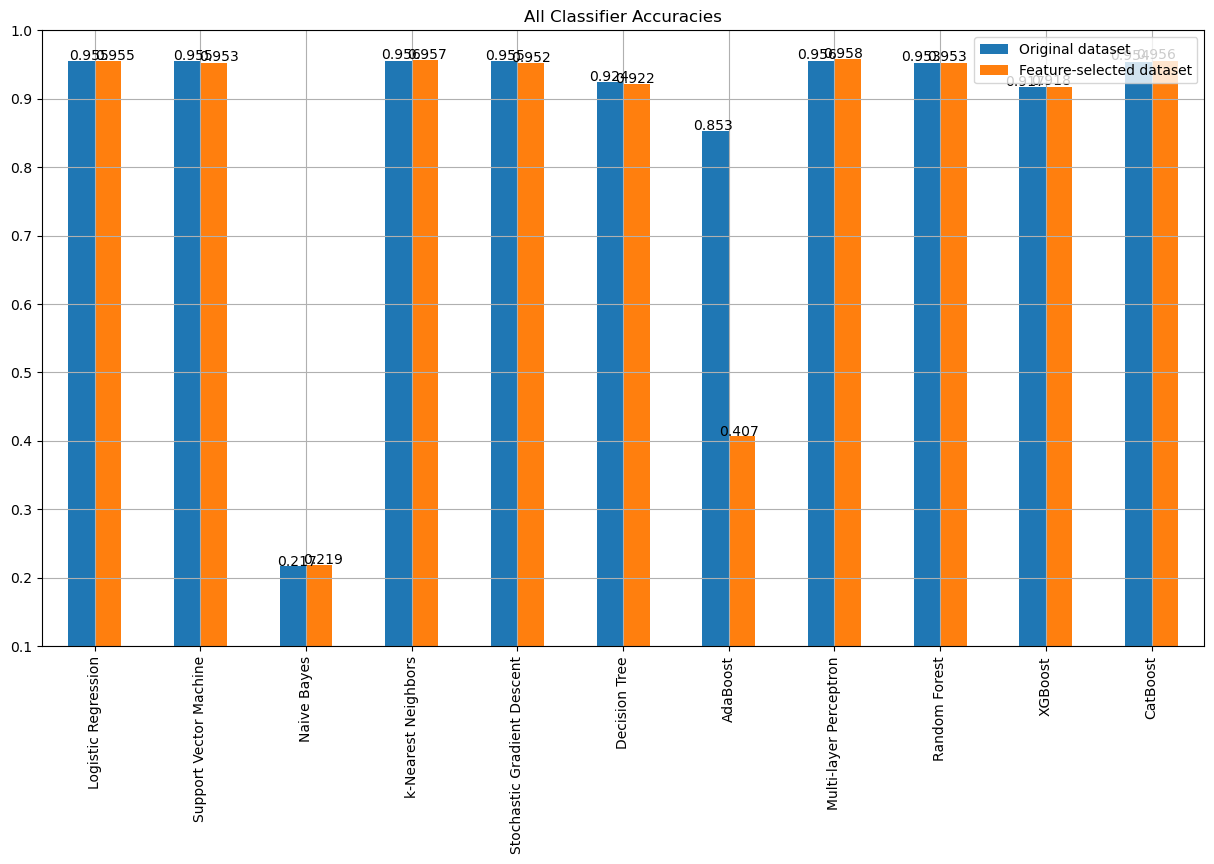

In [122]:
ax = acc_all.plot.bar(figsize=(15, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.002))
plt.ylim((0.10, 1.00))
plt.xticks(rotation=90)
plt.title("All Classifier Accuracies")
plt.grid()
plt.show()

# Using RFE and Logistic Regression

In [129]:
log_reg = LogisticRegression(random_state=0)
Y_fe_train_1d = np.argmax(Y_fe_train.values, axis=1)
sel = SelectFromModel(log_reg)
sel.fit(X_fe_train, Y_fe_train_1d)
features = X_fe_train.columns[sel.get_support()]
print("Selected features:", features)
print("Number of selected features:", len(features))
X_train_rfe = sel.transform(X_fe_train)
X_test_rfe = sel.transform(X_fe_test)

Selected features: Index(['Flow Duration', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Min', 'Bwd IAT Tot',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min',
       'Protocol', 'Fwd PSH Flags', 'SYN Flag Cnt', 'RST Flag Cnt',
       'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'ECE Flag Cnt'],
      dtype='object')
Number of selected features: 19


In [130]:
Y_fe_train_1d = np.argmax(Y_fe_train.values, axis=1)

random_state = 42

clf_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
            "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_values = [LogisticRegression(random_state=random_state), SVC(kernel="linear", random_state=random_state),
              GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
              DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
              MLPClassifier(random_state=random_state, max_iter=1000)]
clf_rfe_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
                "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_rfe_values = [LogisticRegression(random_state=random_state), SVC(kernel="linear",random_state=random_state),
                  GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
                  DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
                  MLPClassifier(random_state=random_state, max_iter=1000)]

unique_classes = np.unique(Y_fe_train_1d)
class_mapping = {cls: idx for idx, cls in enumerate(unique_classes)}
Y_fe_train_1d_mapped = np.vectorize(class_mapping.get)(Y_fe_train_1d)

# Add RandomForest, XGBoost, and CatBoost to the classifiers list
clf_keys += ["Random Forest", "XGBoost", "CatBoost"]
clf_values += [RandomForestClassifier(random_state=random_state), 
                XGBClassifier(random_state=random_state), 
                CatBoostClassifier(random_state=random_state, verbose=0)]

clf_rfe_keys += ["Random Forest", "XGBoost", "CatBoost"]
clf_rfe_values += [RandomForestClassifier(random_state=random_state), 
                    XGBClassifier(random_state=random_state), 
                    CatBoostClassifier(random_state=random_state, verbose=0)]

clfs = dict(zip(clf_keys, clf_values))
clfs_rfe = dict(zip(clf_rfe_keys, clf_rfe_values))

# Original dataset
print("Model training using original data: started!")
for clf_name, clf in clfs.items():
    if clf_name == 'XGBoost':
        clf.fit(X_fe_train, Y_fe_train_1d_mapped)
    else:
        clf.fit(X_fe_train, Y_fe_train_1d)
    clfs[clf_name] = clf
    print(clf_name, "training: done!")
print("Model training using original data: done!\n")

# Feature-selected dataset
print("Model training using feature-selected data: started!")
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    if clf_rfe_name == 'XGBoost':
        clf_rfe.fit(X_train_rfe, Y_fe_train_1d_mapped)
    else:
        clf_rfe.fit(X_train_rfe, Y_fe_train_1d)
    clfs_rfe[clf_rfe_name] = clf_rfe
    print(clf_rfe_name, "training: done!")
print("Model training using feature-selected data: done!")

Model training using original data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Random Forest training: done!
XGBoost training: done!
CatBoost training: done!
Model training using original data: done!

Model training using feature-selected data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Random Forest training: done!
XGBoost training: done!
CatBoost training: done!
Model training using feature-selected data: done!


In [131]:
Y_fe_test_1d = np.argmax(Y_fe_test.values, axis=1)

# Original dataset
acc = []
for clf_name, clf in clfs.items():
    y_pred = clf.predict(X_fe_test)
    acc.append(accuracy_score(Y_fe_test_1d, y_pred))

# Feature selected dataset
acc_rfe = []
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    y_rfe_pred = clf_rfe.predict(X_test_rfe)
    acc_rfe.append(accuracy_score(Y_fe_test_1d, y_rfe_pred))
    
acc_all = pd.DataFrame({"Original dataset": acc, "Feature-selected dataset": acc_rfe},index=clf_keys)
acc_all

,Original dataset,Feature-selected dataset
Logistic Regression,0.9552,0.9552
Support Vector Machine,0.9550,0.9550
Naive Bayes,0.2166,0.2512
k-Nearest Neighbors,0.9558,0.9552
Stochastic Gradient Descent,0.9554,0.9554
Decision Tree,0.9238,0.9340
AdaBoost,0.8534,0.9460
Multi-layer Perceptron,0.9558,0.9558
Random Forest,0.9526,0.9536
XGBoost,0.9170,0.9200


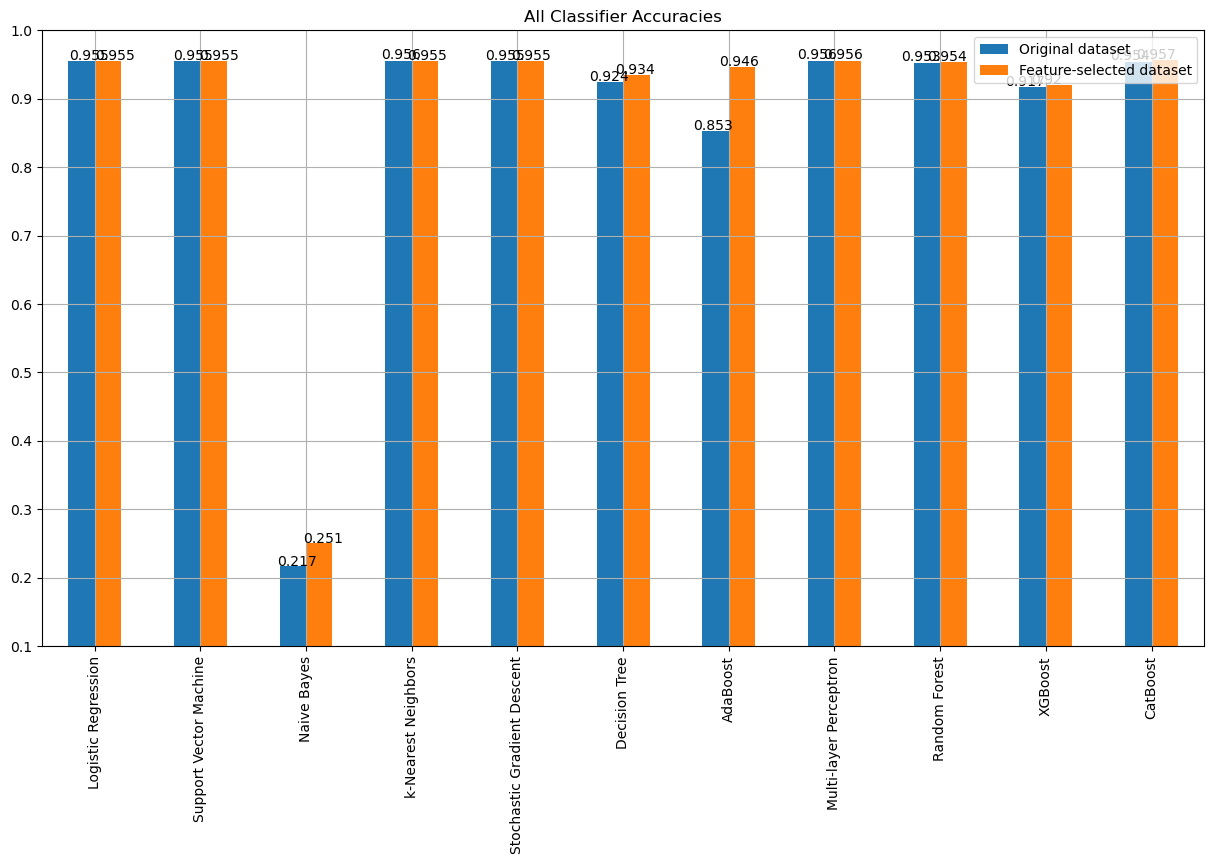

In [132]:
ax = acc_all.plot.bar(figsize=(15, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.002))
plt.ylim((0.10, 1.00))
plt.xticks(rotation=90)
plt.title("All Classifier Accuracies")
plt.grid()
plt.show()

# RFE using SVM

In [134]:
svm = SVC(kernel='linear', random_state=0)
Y_fe_train_1d = np.argmax(Y_fe_train.values, axis=1)
sel = SelectFromModel(svm)
sel.fit(X_fe_train, Y_fe_train_1d)
features = X_fe_train.columns[sel.get_support()]
print("Selected features:", features)
print("Number of selected features:", len(features))
X_train_rfe = sel.transform(X_fe_train)
X_test_rfe = sel.transform(X_fe_test)

Selected features: Index(['Flow Duration', 'Bwd Pkt Len Max', 'Flow IAT Max', 'Fwd IAT Tot',
       'Fwd IAT Max', 'Pkt Len Max', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Seg Size Min', 'Fwd PSH Flags', 'Fwd URG Flags', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt'],
      dtype='object')
Number of selected features: 18


In [135]:
Y_fe_train_1d = np.argmax(Y_fe_train.values, axis=1)

random_state = 42

clf_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
            "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_values = [LogisticRegression(random_state=random_state), SVC(kernel="linear", random_state=random_state),
              GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
              DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
              MLPClassifier(random_state=random_state, max_iter=1000)]
clf_rfe_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
                "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_rfe_values = [LogisticRegression(random_state=random_state), SVC(kernel="linear",random_state=random_state),
                  GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
                  DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
                  MLPClassifier(random_state=random_state, max_iter=1000)]

unique_classes = np.unique(Y_fe_train_1d)
class_mapping = {cls: idx for idx, cls in enumerate(unique_classes)}
Y_fe_train_1d_mapped = np.vectorize(class_mapping.get)(Y_fe_train_1d)

# Add RandomForest, XGBoost, and CatBoost to the classifiers list
clf_keys += ["Random Forest", "XGBoost", "CatBoost"]
clf_values += [RandomForestClassifier(random_state=random_state), 
                XGBClassifier(random_state=random_state), 
                CatBoostClassifier(random_state=random_state, verbose=0)]

clf_rfe_keys += ["Random Forest", "XGBoost", "CatBoost"]
clf_rfe_values += [RandomForestClassifier(random_state=random_state), 
                    XGBClassifier(random_state=random_state), 
                    CatBoostClassifier(random_state=random_state, verbose=0)]

clfs = dict(zip(clf_keys, clf_values))
clfs_rfe = dict(zip(clf_rfe_keys, clf_rfe_values))

# Original dataset
print("Model training using original data: started!")
for clf_name, clf in clfs.items():
    if clf_name == 'XGBoost':
        clf.fit(X_fe_train, Y_fe_train_1d_mapped)
    else:
        clf.fit(X_fe_train, Y_fe_train_1d)
    clfs[clf_name] = clf
    print(clf_name, "training: done!")
print("Model training using original data: done!\n")

# Feature-selected dataset
print("Model training using feature-selected data: started!")
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    if clf_rfe_name == 'XGBoost':
        clf_rfe.fit(X_train_rfe, Y_fe_train_1d_mapped)
    else:
        clf_rfe.fit(X_train_rfe, Y_fe_train_1d)
    clfs_rfe[clf_rfe_name] = clf_rfe
    print(clf_rfe_name, "training: done!")
print("Model training using feature-selected data: done!")

Model training using original data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Random Forest training: done!
XGBoost training: done!
CatBoost training: done!
Model training using original data: done!

Model training using feature-selected data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Random Forest training: done!
XGBoost training: done!
CatBoost training: done!
Model training using feature-selected data: done!


In [136]:
Y_fe_test_1d = np.argmax(Y_fe_test.values, axis=1)

# Original dataset
acc = []
for clf_name, clf in clfs.items():
    y_pred = clf.predict(X_fe_test)
    acc.append(accuracy_score(Y_fe_test_1d, y_pred))

# Feature selected dataset
acc_rfe = []
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    y_rfe_pred = clf_rfe.predict(X_test_rfe)
    acc_rfe.append(accuracy_score(Y_fe_test_1d, y_rfe_pred))
    
acc_all = pd.DataFrame({"Original dataset": acc, "Feature-selected dataset": acc_rfe},index=clf_keys)
acc_all

,Original dataset,Feature-selected dataset
Logistic Regression,0.9552,0.9554
Support Vector Machine,0.9550,0.9550
Naive Bayes,0.2166,0.9098
k-Nearest Neighbors,0.9558,0.9556
Stochastic Gradient Descent,0.9554,0.9540
Decision Tree,0.9238,0.9270
AdaBoost,0.8534,0.9586
Multi-layer Perceptron,0.9558,0.9582
Random Forest,0.9526,0.9520
XGBoost,0.9170,0.9196


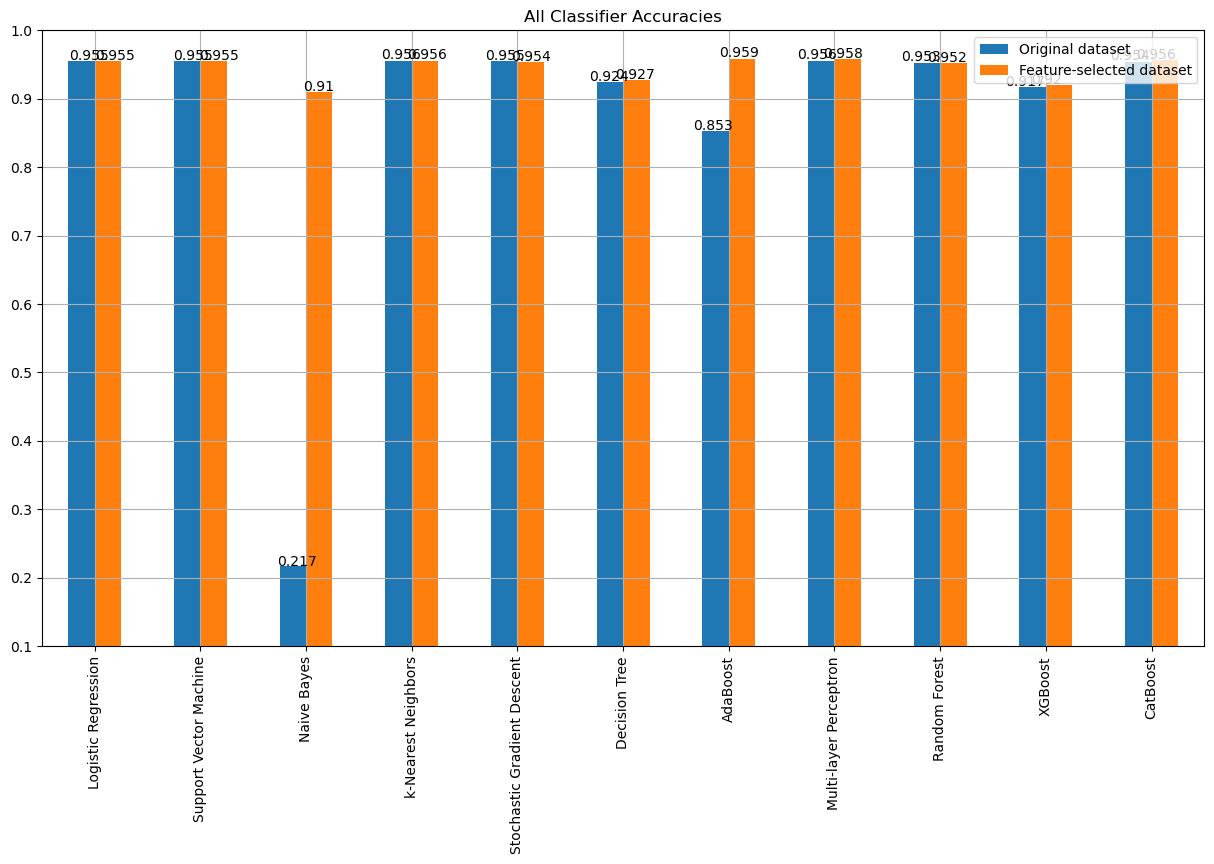

In [137]:
ax = acc_all.plot.bar(figsize=(15, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.002))
plt.ylim((0.10, 1.00))
plt.xticks(rotation=90)
plt.title("All Classifier Accuracies")
plt.grid()
plt.show()

# Using RFE and Variance Based Selection (not possible with KNN)

In [143]:
from sklearn.feature_selection import VarianceThreshold
var_threshold = 0.1  
selector = VarianceThreshold(threshold=var_threshold)
selector.fit(X_fe_train)
selected_features = X_fe_train.columns[selector.get_support()]
print("Selected features:", selected_features)
print("Number of selected features:", len(selected_features))
X_train_rfe = selector.transform(X_fe_train)
X_test_rfe = selector.transform(X_fe_test)


Selected features: Index(['Flow Duration', 'Fwd IAT Tot', 'Init Bwd Win Byts', 'Protocol',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'ECE Flag Cnt'],
      dtype='object')
Number of selected features: 8


In [144]:
Y_fe_train_1d = np.argmax(Y_fe_train.values, axis=1)

random_state = 42

clf_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
            "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_values = [LogisticRegression(random_state=random_state), SVC(kernel="linear", random_state=random_state),
              GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
              DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
              MLPClassifier(random_state=random_state, max_iter=1000)]
clf_rfe_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
                "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_rfe_values = [LogisticRegression(random_state=random_state), SVC(kernel="linear",random_state=random_state),
                  GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
                  DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
                  MLPClassifier(random_state=random_state, max_iter=1000)]

unique_classes = np.unique(Y_fe_train_1d)
class_mapping = {cls: idx for idx, cls in enumerate(unique_classes)}
Y_fe_train_1d_mapped = np.vectorize(class_mapping.get)(Y_fe_train_1d)

# Add RandomForest, XGBoost, and CatBoost to the classifiers list
clf_keys += ["Random Forest", "XGBoost", "CatBoost"]
clf_values += [RandomForestClassifier(random_state=random_state), 
                XGBClassifier(random_state=random_state), 
                CatBoostClassifier(random_state=random_state, verbose=0)]

clf_rfe_keys += ["Random Forest", "XGBoost", "CatBoost"]
clf_rfe_values += [RandomForestClassifier(random_state=random_state), 
                    XGBClassifier(random_state=random_state), 
                    CatBoostClassifier(random_state=random_state, verbose=0)]

clfs = dict(zip(clf_keys, clf_values))
clfs_rfe = dict(zip(clf_rfe_keys, clf_rfe_values))

# Original dataset
print("Model training using original data: started!")
for clf_name, clf in clfs.items():
    if clf_name == 'XGBoost':
        clf.fit(X_fe_train, Y_fe_train_1d_mapped)
    else:
        clf.fit(X_fe_train, Y_fe_train_1d)
    clfs[clf_name] = clf
    print(clf_name, "training: done!")
print("Model training using original data: done!\n")

# Feature-selected dataset
print("Model training using feature-selected data: started!")
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    if clf_rfe_name == 'XGBoost':
        clf_rfe.fit(X_train_rfe, Y_fe_train_1d_mapped)
    else:
        clf_rfe.fit(X_train_rfe, Y_fe_train_1d)
    clfs_rfe[clf_rfe_name] = clf_rfe
    print(clf_rfe_name, "training: done!")
print("Model training using feature-selected data: done!")

Model training using original data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Random Forest training: done!
XGBoost training: done!
CatBoost training: done!
Model training using original data: done!

Model training using feature-selected data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Random Forest training: done!
XGBoost training: done!
CatBoost training: done!
Model training using feature-selected data: done!


In [145]:
Y_fe_test_1d = np.argmax(Y_fe_test.values, axis=1)

# Original dataset
acc = []
for clf_name, clf in clfs.items():
    y_pred = clf.predict(X_fe_test)
    acc.append(accuracy_score(Y_fe_test_1d, y_pred))

# Feature selected dataset
acc_rfe = []
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    y_rfe_pred = clf_rfe.predict(X_test_rfe)
    acc_rfe.append(accuracy_score(Y_fe_test_1d, y_rfe_pred))
    
acc_all = pd.DataFrame({"Original dataset": acc, "Feature-selected dataset": acc_rfe},index=clf_keys)
acc_all

,Original dataset,Feature-selected dataset
Logistic Regression,0.9552,0.9286
Support Vector Machine,0.9550,0.9286
Naive Bayes,0.2166,0.9528
k-Nearest Neighbors,0.9558,0.9546
Stochastic Gradient Descent,0.9554,0.9286
Decision Tree,0.9238,0.9336
AdaBoost,0.8534,0.9588
Multi-layer Perceptron,0.9558,0.9286
Random Forest,0.9526,0.9488
XGBoost,0.9170,0.9180


In [ ]:
ax = acc_all.plot.bar(figsize=(15, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.002))
plt.ylim((0.10, 1.00))
plt.xticks(rotation=90)
plt.title("All Classifier Accuracies")
plt.grid()
plt.show()

# RFE and Stochastic Gradient Descent

In [146]:
sgd_clf = SGDClassifier(loss='log', penalty='l1', alpha=0.01, random_state=0)
Y_fe_train_1d = np.argmax(Y_fe_train.values, axis=1)
sel = SelectFromModel(sgd_clf)
sel.fit(X_fe_train, Y_fe_train_1d)
features = X_fe_train.columns[sel.get_support()]
print("Selected features:", features)
print("Number of selected features:", len(features))
X_train_rfe = sel.transform(X_fe_train)
X_test_rfe = sel.transform(X_fe_test)

Selected features: Index(['Flow Duration', 'Protocol', 'PSH Flag Cnt'], dtype='object')
Number of selected features: 3


In [147]:
Y_fe_train_1d = np.argmax(Y_fe_train.values, axis=1)

random_state = 42

clf_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
            "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_values = [LogisticRegression(random_state=random_state), SVC(kernel="linear", random_state=random_state),
              GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
              DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
              MLPClassifier(random_state=random_state, max_iter=1000)]
clf_rfe_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
                "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_rfe_values = [LogisticRegression(random_state=random_state), SVC(kernel="linear",random_state=random_state),
                  GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
                  DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
                  MLPClassifier(random_state=random_state, max_iter=1000)]

unique_classes = np.unique(Y_fe_train_1d)
class_mapping = {cls: idx for idx, cls in enumerate(unique_classes)}
Y_fe_train_1d_mapped = np.vectorize(class_mapping.get)(Y_fe_train_1d)

# Add RandomForest, XGBoost, and CatBoost to the classifiers list
clf_keys += ["Random Forest", "XGBoost", "CatBoost"]
clf_values += [RandomForestClassifier(random_state=random_state), 
                XGBClassifier(random_state=random_state), 
                CatBoostClassifier(random_state=random_state, verbose=0)]

clf_rfe_keys += ["Random Forest", "XGBoost", "CatBoost"]
clf_rfe_values += [RandomForestClassifier(random_state=random_state), 
                    XGBClassifier(random_state=random_state), 
                    CatBoostClassifier(random_state=random_state, verbose=0)]

clfs = dict(zip(clf_keys, clf_values))
clfs_rfe = dict(zip(clf_rfe_keys, clf_rfe_values))

# Original dataset
print("Model training using original data: started!")
for clf_name, clf in clfs.items():
    if clf_name == 'XGBoost':
        clf.fit(X_fe_train, Y_fe_train_1d_mapped)
    else:
        clf.fit(X_fe_train, Y_fe_train_1d)
    clfs[clf_name] = clf
    print(clf_name, "training: done!")
print("Model training using original data: done!\n")

# Feature-selected dataset
print("Model training using feature-selected data: started!")
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    if clf_rfe_name == 'XGBoost':
        clf_rfe.fit(X_train_rfe, Y_fe_train_1d_mapped)
    else:
        clf_rfe.fit(X_train_rfe, Y_fe_train_1d)
    clfs_rfe[clf_rfe_name] = clf_rfe
    print(clf_rfe_name, "training: done!")
print("Model training using feature-selected data: done!")

Model training using original data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Random Forest training: done!
XGBoost training: done!
CatBoost training: done!
Model training using original data: done!

Model training using feature-selected data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Random Forest training: done!
XGBoost training: done!
CatBoost training: done!
Model training using feature-selected data: done!


In [149]:
Y_fe_test_1d = np.argmax(Y_fe_test.values, axis=1)

# Original dataset
acc = []
for clf_name, clf in clfs.items():
    y_pred = clf.predict(X_fe_test)
    acc.append(accuracy_score(Y_fe_test_1d, y_pred))

# Feature selected dataset
acc_rfe = []
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    y_rfe_pred = clf_rfe.predict(X_test_rfe)
    acc_rfe.append(accuracy_score(Y_fe_test_1d, y_rfe_pred))
    
acc_all = pd.DataFrame({"Original dataset": acc, "Feature-selected dataset": acc_rfe},index=clf_keys)
acc_all

,Original dataset,Feature-selected dataset
Logistic Regression,0.9552,0.9286
Support Vector Machine,0.9550,0.9286
Naive Bayes,0.2166,0.9224
k-Nearest Neighbors,0.9558,0.9466
Stochastic Gradient Descent,0.9554,0.9286
Decision Tree,0.9238,0.9234
AdaBoost,0.8534,0.9488
Multi-layer Perceptron,0.9558,0.9286
Random Forest,0.9526,0.9262
XGBoost,0.9170,0.9190


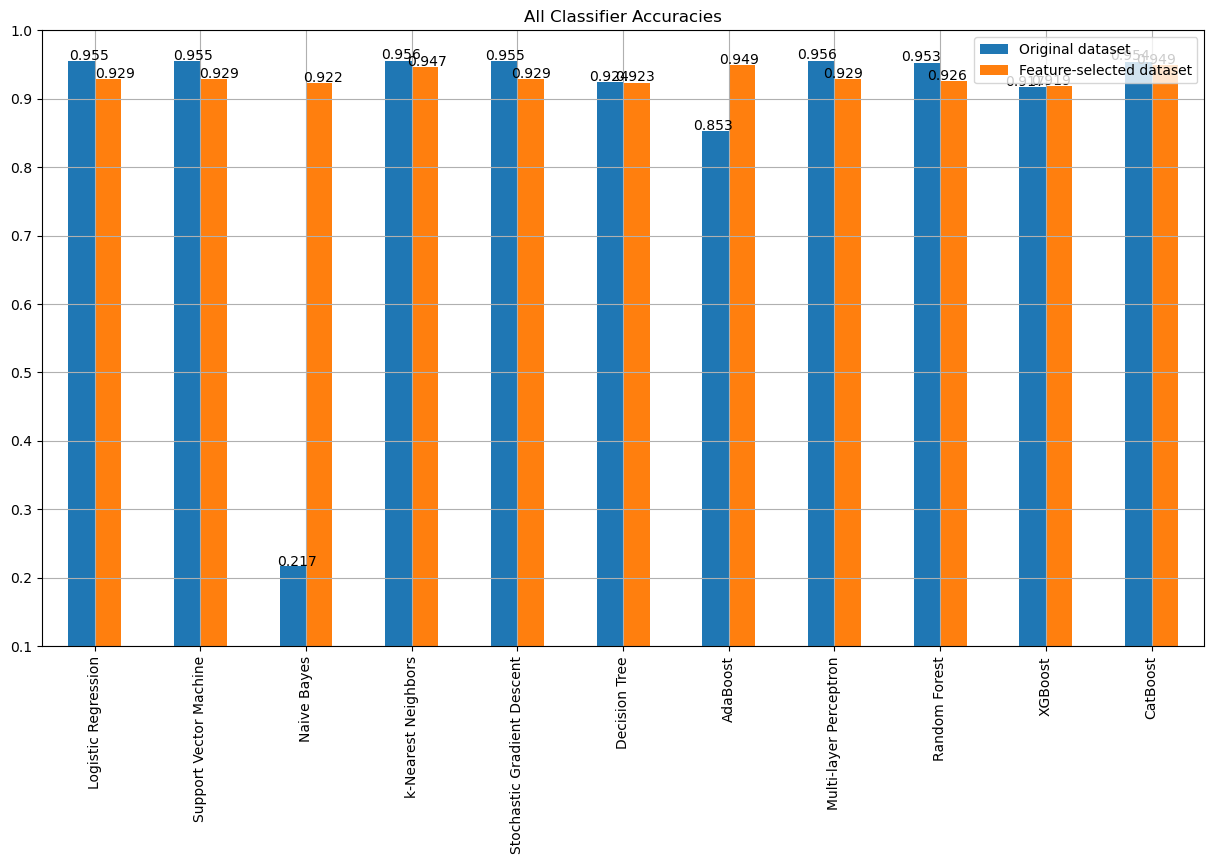

In [150]:
ax = acc_all.plot.bar(figsize=(15, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.002))
plt.ylim((0.10, 1.00))
plt.xticks(rotation=90)
plt.title("All Classifier Accuracies")
plt.grid()
plt.show()

# RFE using Adaboost

In [151]:
base_estimator = DecisionTreeClassifier(max_depth=3)
ada_boost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=0)
Y_fe_train_1d = np.argmax(Y_fe_train.values, axis=1)
sel = SelectFromModel(ada_boost_model)
sel.fit(X_fe_train, Y_fe_train_1d)
features = X_fe_train.columns[sel.get_support()]
print("Selected features:", features)
print("Number of selected features:", len(features))
X_train_rfe = sel.transform(X_fe_train)
X_test_rfe = sel.transform(X_fe_test)

Selected features: Index(['Flow Duration', 'Fwd Pkt Len Max', 'Fwd Pkt Len Mean',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow Byts/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Fwd IAT Mean', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Pkts/s',
       'Pkt Len Mean', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Init Bwd Win Byts', 'Fwd Seg Size Min'],
      dtype='object')
Number of selected features: 20


In [152]:
Y_fe_train_1d = np.argmax(Y_fe_train.values, axis=1)

random_state = 42

clf_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
            "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_values = [LogisticRegression(random_state=random_state), SVC(kernel="linear", random_state=random_state),
              GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
              DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
              MLPClassifier(random_state=random_state, max_iter=1000)]
clf_rfe_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
                "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_rfe_values = [LogisticRegression(random_state=random_state), SVC(kernel="linear",random_state=random_state),
                  GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
                  DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
                  MLPClassifier(random_state=random_state, max_iter=1000)]

unique_classes = np.unique(Y_fe_train_1d)
class_mapping = {cls: idx for idx, cls in enumerate(unique_classes)}
Y_fe_train_1d_mapped = np.vectorize(class_mapping.get)(Y_fe_train_1d)

# Add RandomForest, XGBoost, and CatBoost to the classifiers list
clf_keys += ["Random Forest", "XGBoost", "CatBoost"]
clf_values += [RandomForestClassifier(random_state=random_state), 
                XGBClassifier(random_state=random_state), 
                CatBoostClassifier(random_state=random_state, verbose=0)]

clf_rfe_keys += ["Random Forest", "XGBoost", "CatBoost"]
clf_rfe_values += [RandomForestClassifier(random_state=random_state), 
                    XGBClassifier(random_state=random_state), 
                    CatBoostClassifier(random_state=random_state, verbose=0)]

clfs = dict(zip(clf_keys, clf_values))
clfs_rfe = dict(zip(clf_rfe_keys, clf_rfe_values))

# Original dataset
print("Model training using original data: started!")
for clf_name, clf in clfs.items():
    if clf_name == 'XGBoost':
        clf.fit(X_fe_train, Y_fe_train_1d_mapped)
    else:
        clf.fit(X_fe_train, Y_fe_train_1d)
    clfs[clf_name] = clf
    print(clf_name, "training: done!")
print("Model training using original data: done!\n")

# Feature-selected dataset
print("Model training using feature-selected data: started!")
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    if clf_rfe_name == 'XGBoost':
        clf_rfe.fit(X_train_rfe, Y_fe_train_1d_mapped)
    else:
        clf_rfe.fit(X_train_rfe, Y_fe_train_1d)
    clfs_rfe[clf_rfe_name] = clf_rfe
    print(clf_rfe_name, "training: done!")
print("Model training using feature-selected data: done!")

Model training using original data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Random Forest training: done!
XGBoost training: done!
CatBoost training: done!
Model training using original data: done!

Model training using feature-selected data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Random Forest training: done!
XGBoost training: done!
CatBoost training: done!
Model training using feature-selected data: done!


In [154]:
Y_fe_test_1d = np.argmax(Y_fe_test.values, axis=1)

# Original dataset
acc = []
for clf_name, clf in clfs.items():
    y_pred = clf.predict(X_fe_test)
    acc.append(accuracy_score(Y_fe_test_1d, y_pred))

# Feature selected dataset
acc_rfe = []
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    y_rfe_pred = clf_rfe.predict(X_test_rfe)
    acc_rfe.append(accuracy_score(Y_fe_test_1d, y_rfe_pred))
    
acc_all = pd.DataFrame({"Original dataset": acc, "Feature-selected dataset": acc_rfe},index=clf_keys)
acc_all

,Original dataset,Feature-selected dataset
Logistic Regression,0.9552,0.9526
Support Vector Machine,0.9550,0.9486
Naive Bayes,0.2166,0.3698
k-Nearest Neighbors,0.9558,0.9574
Stochastic Gradient Descent,0.9554,0.9486
Decision Tree,0.9238,0.9244
AdaBoost,0.8534,0.6050
Multi-layer Perceptron,0.9558,0.9580
Random Forest,0.9526,0.9510
XGBoost,0.9170,0.9196


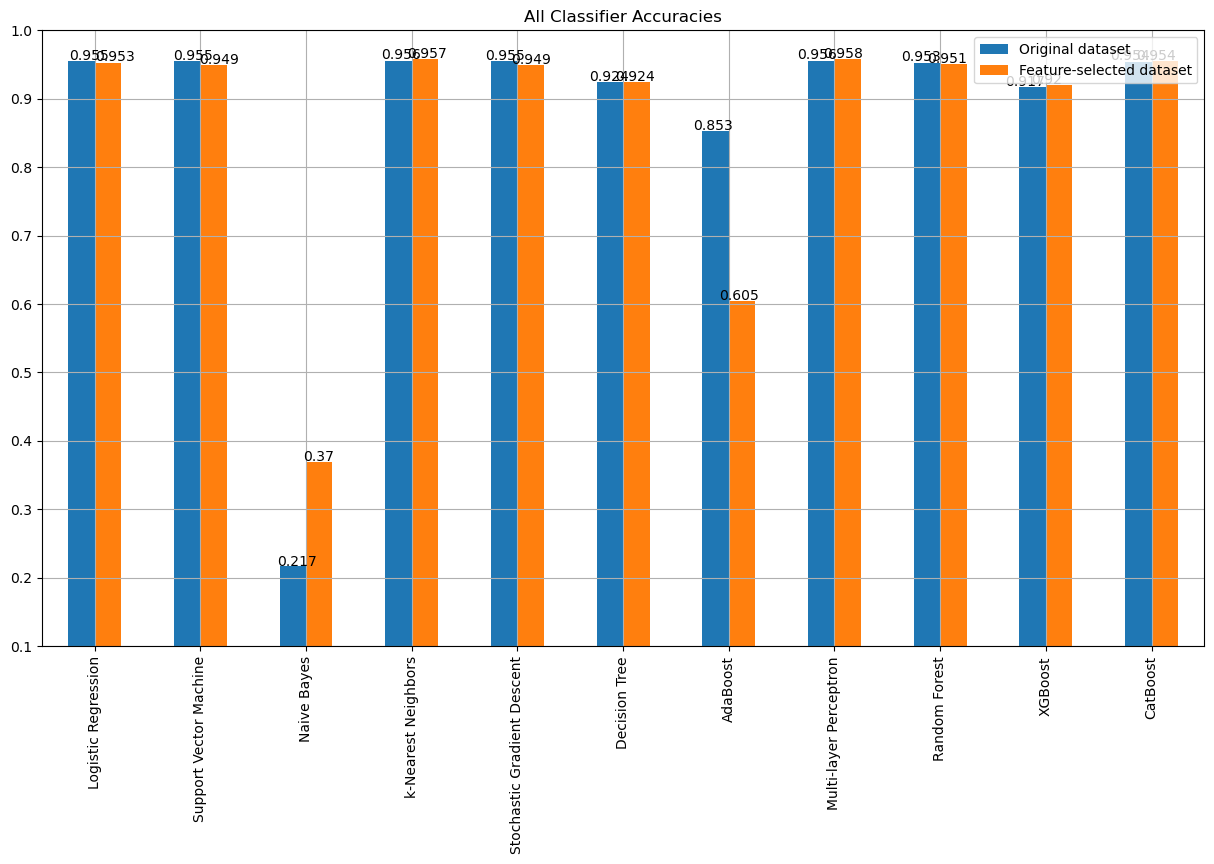

In [155]:
ax = acc_all.plot.bar(figsize=(15, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.002))
plt.ylim((0.10, 1.00))
plt.xticks(rotation=90)
plt.title("All Classifier Accuracies")
plt.grid()
plt.show()

# RFE using XGBoost

In [165]:
unique_classes = np.unique(Y_fe_train_1d)
class_mapping = {class_val: idx for idx, class_val in enumerate(unique_classes)}
Y_fe_train_mapped = np.vectorize(class_mapping.get)(Y_fe_train_1d)
xgb = XGBClassifier(n_estimators=100, random_state=0, n_jobs=-1)
xgb.fit(X_fe_train, Y_fe_train_mapped)
sel = SelectFromModel(xgb)
sel.fit(X_fe_train, Y_fe_train_mapped)
features = X_fe_train.columns[sel.get_support()]
print("Selected features:", features)
print("Number of selected features:", len(features))

Selected features: Index(['Tot Fwd Pkts', 'Bwd Pkt Len Mean', 'Fwd Header Len',
       'Init Bwd Win Byts', 'Fwd Seg Size Min', 'RST Flag Cnt'],
      dtype='object')
Number of selected features: 6


In [166]:
Y_fe_train_1d = np.argmax(Y_fe_train.values, axis=1)

random_state = 42

clf_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
            "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_values = [LogisticRegression(random_state=random_state), SVC(kernel="linear", random_state=random_state),
              GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
              DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
              MLPClassifier(random_state=random_state, max_iter=1000)]
clf_rfe_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
                "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_rfe_values = [LogisticRegression(random_state=random_state), SVC(kernel="linear",random_state=random_state),
                  GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
                  DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
                  MLPClassifier(random_state=random_state, max_iter=1000)]

unique_classes = np.unique(Y_fe_train_1d)
class_mapping = {cls: idx for idx, cls in enumerate(unique_classes)}
Y_fe_train_1d_mapped = np.vectorize(class_mapping.get)(Y_fe_train_1d)

# Add RandomForest, XGBoost, and CatBoost to the classifiers list
clf_keys += ["Random Forest", "XGBoost", "CatBoost"]
clf_values += [RandomForestClassifier(random_state=random_state), 
                XGBClassifier(random_state=random_state), 
                CatBoostClassifier(random_state=random_state, verbose=0)]

clf_rfe_keys += ["Random Forest", "XGBoost", "CatBoost"]
clf_rfe_values += [RandomForestClassifier(random_state=random_state), 
                    XGBClassifier(random_state=random_state), 
                    CatBoostClassifier(random_state=random_state, verbose=0)]

clfs = dict(zip(clf_keys, clf_values))
clfs_rfe = dict(zip(clf_rfe_keys, clf_rfe_values))

# Original dataset
print("Model training using original data: started!")
for clf_name, clf in clfs.items():
    if clf_name == 'XGBoost':
        clf.fit(X_fe_train, Y_fe_train_1d_mapped)
    else:
        clf.fit(X_fe_train, Y_fe_train_1d)
    clfs[clf_name] = clf
    print(clf_name, "training: done!")
print("Model training using original data: done!\n")

# Feature-selected dataset
print("Model training using feature-selected data: started!")
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    if clf_rfe_name == 'XGBoost':
        clf_rfe.fit(X_train_rfe, Y_fe_train_1d_mapped)
    else:
        clf_rfe.fit(X_train_rfe, Y_fe_train_1d)
    clfs_rfe[clf_rfe_name] = clf_rfe
    print(clf_rfe_name, "training: done!")
print("Model training using feature-selected data: done!")

Model training using original data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Random Forest training: done!
XGBoost training: done!
CatBoost training: done!
Model training using original data: done!

Model training using feature-selected data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Random Forest training: done!
XGBoost training: done!
CatBoost training: done!
Model training using feature-selected data: done!


In [167]:
Y_fe_test_1d = np.argmax(Y_fe_test.values, axis=1)

# Original dataset
acc = []
for clf_name, clf in clfs.items():
    y_pred = clf.predict(X_fe_test)
    acc.append(accuracy_score(Y_fe_test_1d, y_pred))

# Feature selected dataset
acc_rfe = []
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    y_rfe_pred = clf_rfe.predict(X_test_rfe)
    acc_rfe.append(accuracy_score(Y_fe_test_1d, y_rfe_pred))
    
acc_all = pd.DataFrame({"Original dataset": acc, "Feature-selected dataset": acc_rfe},index=clf_keys)
acc_all

,Original dataset,Feature-selected dataset
Logistic Regression,0.9552,0.9526
Support Vector Machine,0.9550,0.9486
Naive Bayes,0.2166,0.3698
k-Nearest Neighbors,0.9558,0.9574
Stochastic Gradient Descent,0.9554,0.9486
Decision Tree,0.9238,0.9244
AdaBoost,0.8534,0.6050
Multi-layer Perceptron,0.9558,0.9580
Random Forest,0.9526,0.9510
XGBoost,0.9170,0.9196


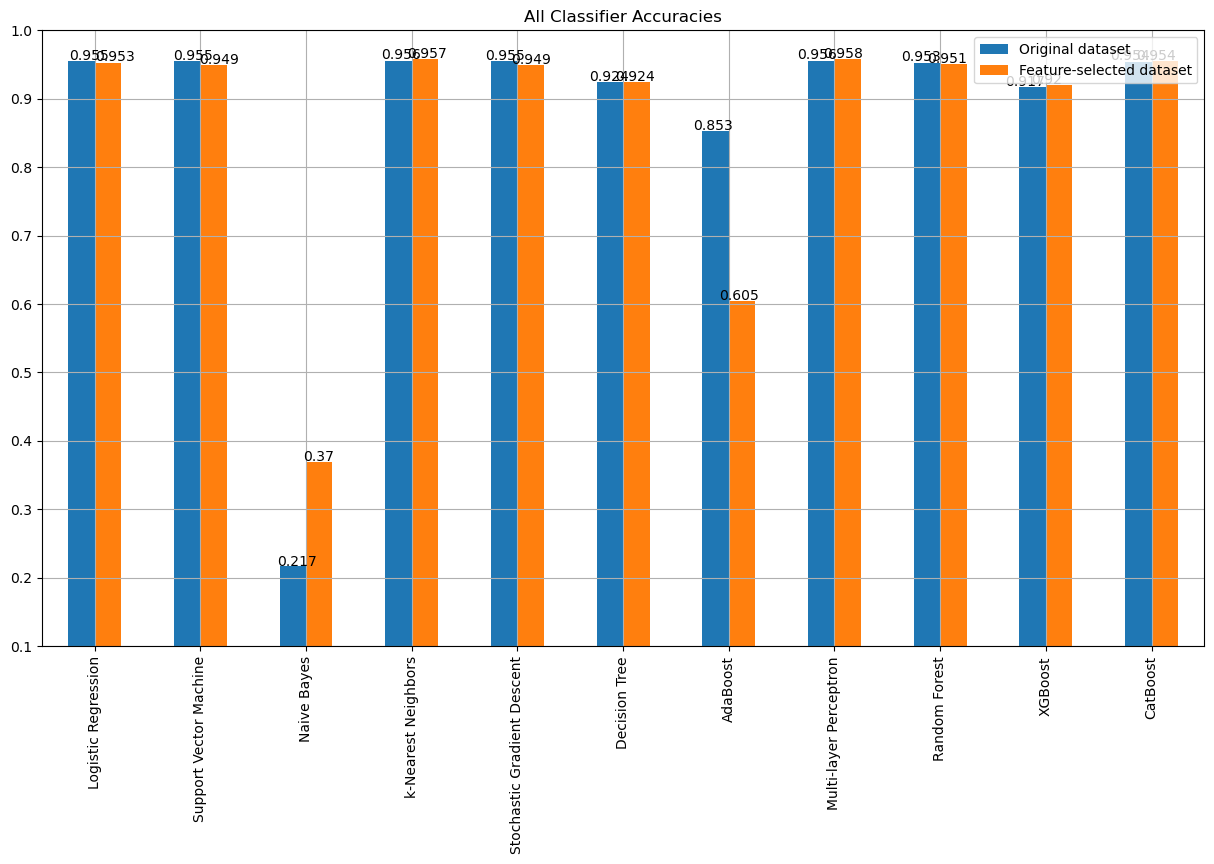

In [168]:
ax = acc_all.plot.bar(figsize=(15, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.002))
plt.ylim((0.10, 1.00))
plt.xticks(rotation=90)
plt.title("All Classifier Accuracies")
plt.grid()
plt.show()

# RFE using CatBoost

In [169]:
from catboost import CatBoostClassifier, Pool

unique_classes = np.unique(Y_fe_train_1d)
class_mapping = {class_val: idx for idx, class_val in enumerate(unique_classes)}
Y_fe_train_mapped = np.vectorize(class_mapping.get)(Y_fe_train_1d)
catboost = CatBoostClassifier(iterations=100, random_state=0, thread_count=-1)
catboost.fit(X_fe_train, Y_fe_train_mapped)
feature_importances = catboost.get_feature_importance(data=Pool(X_fe_train, label=Y_fe_train_mapped))
threshold = np.percentile(feature_importances, 90)  # Adjust the percentile as needed
selected_features = np.array(X_fe_train.columns)[feature_importances >= threshold]
print("Selected features:", selected_features)
print("Number of selected features:", len(selected_features))

Learning rate set to 0.5
0:	learn: 0.4680294	total: 39.7ms	remaining: 3.93s
1:	learn: 0.3127324	total: 59.1ms	remaining: 2.89s
2:	learn: 0.2409309	total: 78.7ms	remaining: 2.54s
3:	learn: 0.2041229	total: 98.1ms	remaining: 2.35s
4:	learn: 0.1876868	total: 109ms	remaining: 2.07s
5:	learn: 0.1717823	total: 128ms	remaining: 2.01s
6:	learn: 0.1632528	total: 149ms	remaining: 1.97s
7:	learn: 0.1538212	total: 167ms	remaining: 1.93s
8:	learn: 0.1500724	total: 186ms	remaining: 1.88s
9:	learn: 0.1462576	total: 206ms	remaining: 1.85s
10:	learn: 0.1439006	total: 225ms	remaining: 1.82s
11:	learn: 0.1417145	total: 244ms	remaining: 1.79s
12:	learn: 0.1401865	total: 263ms	remaining: 1.76s
13:	learn: 0.1383093	total: 282ms	remaining: 1.73s
14:	learn: 0.1365995	total: 301ms	remaining: 1.71s
15:	learn: 0.1352610	total: 320ms	remaining: 1.68s
16:	learn: 0.1345668	total: 338ms	remaining: 1.65s
17:	learn: 0.1329671	total: 357ms	remaining: 1.63s
18:	learn: 0.1312437	total: 377ms	remaining: 1.6s
19:	learn: 0.

In [170]:
Y_fe_train_1d = np.argmax(Y_fe_train.values, axis=1)

random_state = 42

clf_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
            "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_values = [LogisticRegression(random_state=random_state), SVC(kernel="linear", random_state=random_state),
              GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
              DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
              MLPClassifier(random_state=random_state, max_iter=1000)]
clf_rfe_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
                "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_rfe_values = [LogisticRegression(random_state=random_state), SVC(kernel="linear",random_state=random_state),
                  GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
                  DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
                  MLPClassifier(random_state=random_state, max_iter=1000)]

unique_classes = np.unique(Y_fe_train_1d)
class_mapping = {cls: idx for idx, cls in enumerate(unique_classes)}
Y_fe_train_1d_mapped = np.vectorize(class_mapping.get)(Y_fe_train_1d)

# Add RandomForest, XGBoost, and CatBoost to the classifiers list
clf_keys += ["Random Forest", "XGBoost", "CatBoost"]
clf_values += [RandomForestClassifier(random_state=random_state), 
                XGBClassifier(random_state=random_state), 
                CatBoostClassifier(random_state=random_state, verbose=0)]

clf_rfe_keys += ["Random Forest", "XGBoost", "CatBoost"]
clf_rfe_values += [RandomForestClassifier(random_state=random_state), 
                    XGBClassifier(random_state=random_state), 
                    CatBoostClassifier(random_state=random_state, verbose=0)]

clfs = dict(zip(clf_keys, clf_values))
clfs_rfe = dict(zip(clf_rfe_keys, clf_rfe_values))

# Original dataset
print("Model training using original data: started!")
for clf_name, clf in clfs.items():
    if clf_name == 'XGBoost':
        clf.fit(X_fe_train, Y_fe_train_1d_mapped)
    else:
        clf.fit(X_fe_train, Y_fe_train_1d)
    clfs[clf_name] = clf
    print(clf_name, "training: done!")
print("Model training using original data: done!\n")

# Feature-selected dataset
print("Model training using feature-selected data: started!")
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    if clf_rfe_name == 'XGBoost':
        clf_rfe.fit(X_train_rfe, Y_fe_train_1d_mapped)
    else:
        clf_rfe.fit(X_train_rfe, Y_fe_train_1d)
    clfs_rfe[clf_rfe_name] = clf_rfe
    print(clf_rfe_name, "training: done!")
print("Model training using feature-selected data: done!")

Model training using original data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Random Forest training: done!
XGBoost training: done!
CatBoost training: done!
Model training using original data: done!

Model training using feature-selected data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Random Forest training: done!
XGBoost training: done!
CatBoost training: done!
Model training using feature-selected data: done!


In [172]:
Y_fe_test_1d = np.argmax(Y_fe_test.values, axis=1)

# Original dataset
acc = []
for clf_name, clf in clfs.items():
    y_pred = clf.predict(X_fe_test)
    acc.append(accuracy_score(Y_fe_test_1d, y_pred))

# Feature selected dataset
acc_rfe = []
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    y_rfe_pred = clf_rfe.predict(X_test_rfe)
    acc_rfe.append(accuracy_score(Y_fe_test_1d, y_rfe_pred))
    
acc_all = pd.DataFrame({"Original dataset": acc, "Feature-selected dataset": acc_rfe},index=clf_keys)
acc_all

,Original dataset,Feature-selected dataset
Logistic Regression,0.9552,0.9526
Support Vector Machine,0.9550,0.9486
Naive Bayes,0.2166,0.3698
k-Nearest Neighbors,0.9558,0.9574
Stochastic Gradient Descent,0.9554,0.9486
Decision Tree,0.9238,0.9244
AdaBoost,0.8534,0.6050
Multi-layer Perceptron,0.9558,0.9580
Random Forest,0.9526,0.9510
XGBoost,0.9170,0.9196


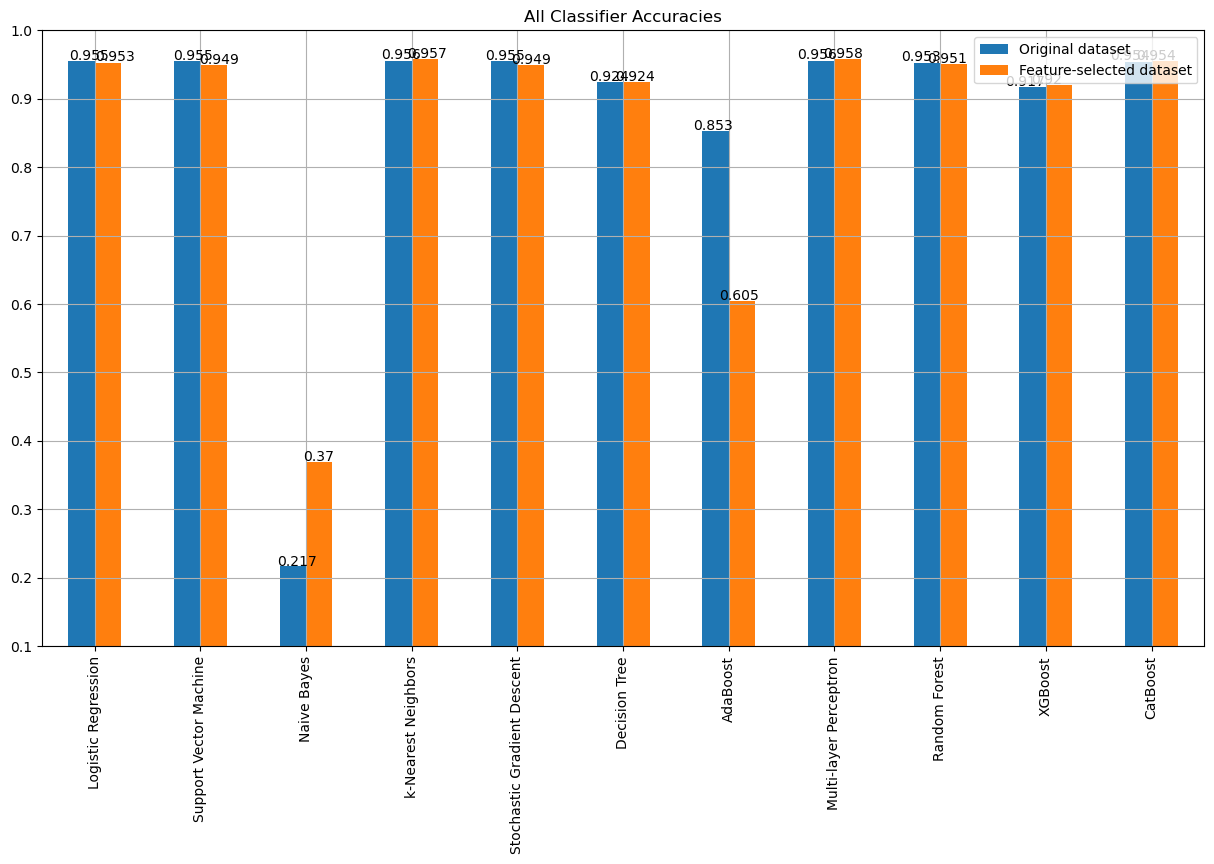

In [174]:
ax = acc_all.plot.bar(figsize=(15, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.002))
plt.ylim((0.10, 1.00))
plt.xticks(rotation=90)
plt.title("All Classifier Accuracies")
plt.grid()
plt.show()

# RFE Using Decision Tree

In [173]:
decision_tree = DecisionTreeClassifier(random_state=0)
Y_fe_train_1d = np.argmax(Y_fe_train.values, axis=1)
sel = SelectFromModel(decision_tree)
sel.fit(X_fe_train, Y_fe_train_1d)
features = X_fe_train.columns[sel.get_support()]
print("Selected features:", features)
print("Number of selected features:", len(features))
X_train_rfe = sel.transform(X_fe_train)
X_test_rfe = sel.transform(X_fe_test)

Selected features: Index(['Flow Duration', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s',
       'Flow IAT Mean', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Min', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Size Avg', 'Init Fwd Win Byts', 'Fwd Seg Size Min'],
      dtype='object')
Number of selected features: 16


In [175]:
Y_fe_train_1d = np.argmax(Y_fe_train.values, axis=1)

random_state = 42

clf_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
            "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_values = [LogisticRegression(random_state=random_state), SVC(kernel="linear", random_state=random_state),
              GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
              DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
              MLPClassifier(random_state=random_state, max_iter=1000)]
clf_rfe_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
                "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Multi-layer Perceptron"]
clf_rfe_values = [LogisticRegression(random_state=random_state), SVC(kernel="linear",random_state=random_state),
                  GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
                  DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state), 
                  MLPClassifier(random_state=random_state, max_iter=1000)]

unique_classes = np.unique(Y_fe_train_1d)
class_mapping = {cls: idx for idx, cls in enumerate(unique_classes)}
Y_fe_train_1d_mapped = np.vectorize(class_mapping.get)(Y_fe_train_1d)

# Add RandomForest, XGBoost, and CatBoost to the classifiers list
clf_keys += ["Random Forest", "XGBoost", "CatBoost"]
clf_values += [RandomForestClassifier(random_state=random_state), 
                XGBClassifier(random_state=random_state), 
                CatBoostClassifier(random_state=random_state, verbose=0)]

clf_rfe_keys += ["Random Forest", "XGBoost", "CatBoost"]
clf_rfe_values += [RandomForestClassifier(random_state=random_state), 
                    XGBClassifier(random_state=random_state), 
                    CatBoostClassifier(random_state=random_state, verbose=0)]

clfs = dict(zip(clf_keys, clf_values))
clfs_rfe = dict(zip(clf_rfe_keys, clf_rfe_values))

# Original dataset
print("Model training using original data: started!")
for clf_name, clf in clfs.items():
    if clf_name == 'XGBoost':
        clf.fit(X_fe_train, Y_fe_train_1d_mapped)
    else:
        clf.fit(X_fe_train, Y_fe_train_1d)
    clfs[clf_name] = clf
    print(clf_name, "training: done!")
print("Model training using original data: done!\n")

# Feature-selected dataset
print("Model training using feature-selected data: started!")
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    if clf_rfe_name == 'XGBoost':
        clf_rfe.fit(X_train_rfe, Y_fe_train_1d_mapped)
    else:
        clf_rfe.fit(X_train_rfe, Y_fe_train_1d)
    clfs_rfe[clf_rfe_name] = clf_rfe
    print(clf_rfe_name, "training: done!")
print("Model training using feature-selected data: done!")

Model training using original data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Random Forest training: done!
XGBoost training: done!
CatBoost training: done!
Model training using original data: done!

Model training using feature-selected data: started!
Logistic Regression training: done!
Support Vector Machine training: done!
Naive Bayes training: done!
k-Nearest Neighbors training: done!
Stochastic Gradient Descent training: done!
Decision Tree training: done!
AdaBoost training: done!
Multi-layer Perceptron training: done!
Random Forest training: done!
XGBoost training: done!
CatBoost training: done!
Model training using feature-selected data: done!


In [176]:
Y_fe_test_1d = np.argmax(Y_fe_test.values, axis=1)

# Original dataset
acc = []
for clf_name, clf in clfs.items():
    y_pred = clf.predict(X_fe_test)
    acc.append(accuracy_score(Y_fe_test_1d, y_pred))

# Feature selected dataset
acc_rfe = []
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    y_rfe_pred = clf_rfe.predict(X_test_rfe)
    acc_rfe.append(accuracy_score(Y_fe_test_1d, y_rfe_pred))
    
acc_all = pd.DataFrame({"Original dataset": acc, "Feature-selected dataset": acc_rfe},index=clf_keys)
acc_all

,Original dataset,Feature-selected dataset
Logistic Regression,0.9552,0.9546
Support Vector Machine,0.9550,0.9528
Naive Bayes,0.2166,0.2616
k-Nearest Neighbors,0.9558,0.9562
Stochastic Gradient Descent,0.9554,0.9500
Decision Tree,0.9238,0.9222
AdaBoost,0.8534,0.7204
Multi-layer Perceptron,0.9558,0.9562
Random Forest,0.9526,0.9500
XGBoost,0.9170,0.9164


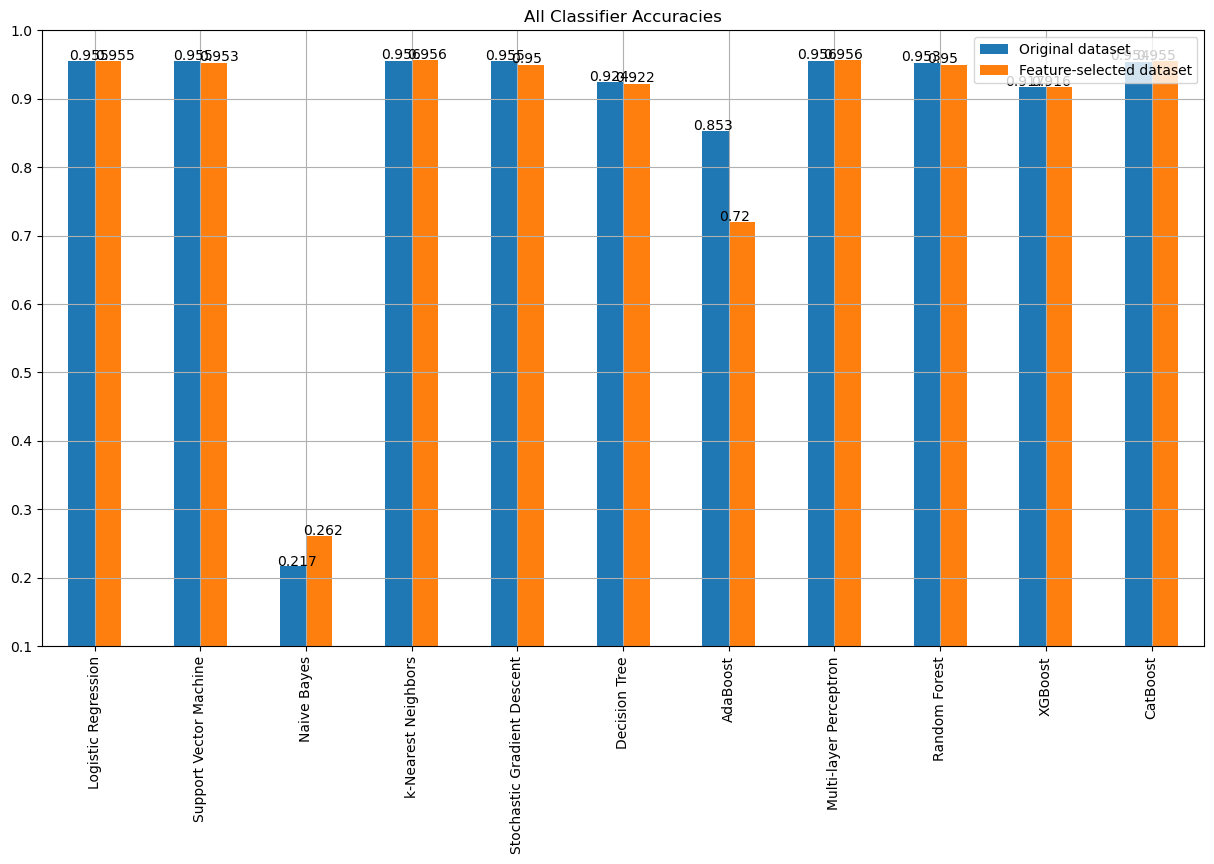

In [177]:
ax = acc_all.plot.bar(figsize=(15, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.002))
plt.ylim((0.10, 1.00))
plt.xticks(rotation=90)
plt.title("All Classifier Accuracies")
plt.grid()
plt.show()